In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import poisson

Text(0.5, 1.0, 'e.coli/norfloxacin mutation rate')

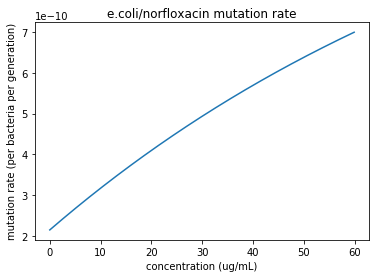

In [67]:
# MUTATION RATE
def mutation_rate(concentration):
    mu_basal = 2.15*10**-10 # basal mutation rate
    m = 6 # max fold increase in mutation rate
    h = 0.01 # steepness of curve
    return mu_basal + (1-np.exp(-h*concentration))*(m-1)*mu_basal
concentrations = np.arange(0,60,0.1)
mutation_rates = [mutation_rate(conc) for conc in concentrations]
plt.plot(concentrations,mutation_rates)
plt.xlabel("concentration (ug/mL)")
plt.ylabel("mutation rate (per bacteria per generation)")
plt.title("e.coli/norfloxacin mutation rate")


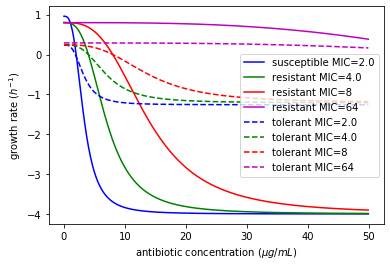

MSC = 1.0744266140024656
k = 3
MDK = 3.3
min growth = -4
max growth susceptible = 0.96
max growth resistant = 0.8


In [68]:
#PARAMETERS FOR AMPICILLIN
MIC = 2.0 # ug/mL
MIC_r1 = 4.0 # ug/mL
MIC_r2 = 8
MIC_r3 = 64
MDK = 3.3 # assumed to be 1 for sus, so must be greater than 1
k = 3
min_growth = -4
max_growth_s = 0.96
max_growth_r1 = max_growth_r2 = max_growth_r3 = 0.80

# k = ufloat(0.75, 0.19)
# min_growth = ufloat(-4.0, 0.8)
# max_growth = ufloat(0.75, 0.21)

def fitness_r1(c):
    return max_growth_r1 - (((max_growth_r1 - min_growth)*((c/MIC_r1)**k))/(((c/MIC_r1)**k)-(min_growth/max_growth_r1)))
def fitness_r2(c):
    return max_growth_r2 - (((max_growth_r2 - min_growth)*((c/MIC_r2)**k))/(((c/MIC_r2)**k)-(min_growth/max_growth_r2)))
def fitness_r3(c):
    return max_growth_r3 - (((max_growth_r3 - min_growth)*((c/MIC_r3)**k))/(((c/MIC_r3)**k)-(min_growth/max_growth_r3)))
def fitness_s(c):
    return max_growth_s - (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))
def fitness_t(c):
    return max_growth_r1/MDK - (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))/MDK
def fitness_tolr1(c):
    return max_growth_r2/MDK - (((max_growth_r1 - min_growth)*(c/MIC_r1)**k)/(((c/MIC_r1)**k)-(min_growth/max_growth_r1)))/MDK
def fitness_tolr2(c):
    return max_growth_r3/MDK - (((max_growth_r2 - min_growth)*(c/MIC_r2)**k)/(((c/MIC_r2)**k)-(min_growth/max_growth_r2)))/MDK
def fitness_tolr3(c):
    return max_growth_s/MDK - (((max_growth_r3 - min_growth)*(c/MIC_r3)**k)/(((c/MIC_r3)**k)-(min_growth/max_growth_r3)))/MDK

concentrations = np.arange(0,50,0.1)
growth_s = [fitness_s(c) for c in concentrations]
growth_r1 = [fitness_r1(c) for c in concentrations]
growth_r2 = [fitness_r2(c) for c in concentrations]
growth_r3 = [fitness_r3(c) for c in concentrations]
growth_t = [fitness_t(c) for c in concentrations]
growth_tr1 = [fitness_tolr1(c) for c in concentrations]
growth_tr2 = [fitness_tolr2(c) for c in concentrations]
growth_tr3 = [fitness_tolr3(c) for c in concentrations]

plt.figure()
plt.plot(concentrations,growth_s,label='susceptible MIC='+str(MIC) ,color='b')
plt.plot(concentrations,growth_r1,label='resistant MIC='+str(MIC_r1),color='g')
plt.plot(concentrations,growth_r2,label='resistant MIC='+str(MIC_r2),color='r')
plt.plot(concentrations,growth_r3,label='resistant MIC='+str(MIC_r3),color='m')
plt.plot(concentrations,growth_t,label='tolerant MIC='+str(MIC),color='b',linestyle='dashed')
plt.plot(concentrations,growth_tr1,label='tolerant MIC='+str(MIC_r1),color='g',linestyle='dashed')
plt.plot(concentrations,growth_tr2,label='tolerant MIC='+str(MIC_r2),color='r',linestyle='dashed')
plt.plot(concentrations,growth_tr3,label='tolerant MIC='+str(MIC_r3),color='m',linestyle='dashed')
plt.legend()
plt.xlabel("antibiotic concentration $(\mu g/mL)$")
plt.ylabel("growth rate $(h^{-1})$")
plt.show()

sc = 1 - (max_growth_r1/max_growth_s)
a = 1+(max_growth_r1/-min_growth)
MSC = (sc/(a-(a*(1-sc)/(MIC_r1/MIC)**k)))**(1/k)
print("MSC =",MSC*MIC)

print("k =", k)
print("MDK =", MDK)
print("min growth =", min_growth)
print("max growth susceptible =", max_growth_s)
print("max growth resistant =", max_growth_r1)
# ideal for killing the resistant bacteria quickly is between the MIC and the threshold at which 
# tolerant bacteria become more fit than resistant
# propose a new window of concentrations for ideal killing of resistant bacteria
# for very high concentrations, can run simulations to determine the likelihood
# that tolerant bacteria give rise to resistant bacteria before the antibiotic degrades

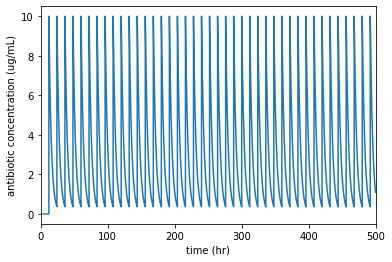

In [59]:
# CONSTANT ANTIBIOTIC CONCENTRATION CONSTANTS WITH PERSISTENCE
# PARAMETERS FOR AMPICILLIN/E.COLI
MIC = 2.0 # ug/mL
MIC_r1 = 4.0 # ug/mL
MIC_r2 = 8
MIC_r3 = 64
MDK = 8 # assumed to be 1 for sus, so must be greater than 1
k = 0.75
min_growth = -3.5
max_growth_s = 0.96
max_growth_r1 = max_growth_r2 = max_growth_r3 = 0.75

# SIMULATION
T = 500
dt = 0.01
t = np.arange(0,T,dt)
r_initial = 0
s_initial = 10**5
t_initial = 0
p_initial = 0


#ANTIBIOTIC CONCENTRATION PARAMETERS
conc_max = 10 # ug/mL
conc_min = 1 # ug/mL
freq = 12 # hr
growth_period = 12

def conc(t):
    if t < growth_period:
        antibiotic_conc = 0
    else:
        n = t//freq
        decay_rate = -0.27726 #(1/freq)*np.log(conc_min/conc_max)
        antibiotic_conc = conc_max*np.exp(decay_rate*(t-(freq*n)))
    return(antibiotic_conc)

concentration = [conc(time) for time in t]
plt.figure()
plt.plot(t,concentration)
plt.xlabel("time (hr)")
plt.xlim(0,T)
plt.ylabel("antibiotic concentration (ug/mL)")
plt.show()

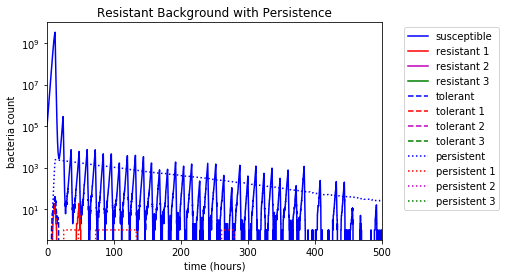

In [73]:
# TOLERANCE AND PERSISTENCE

r1 = [r_initial]*len(t)
r2 = [r_initial]*len(t)
r3 = [r_initial]*len(t)
s = [s_initial]*len(t)
tol = [t_initial]*len(t)
ps = [p_initial]*len(t)
pr1 = [p_initial]*len(t)
pr2 = [p_initial]*len(t)
pr3 = [p_initial]*len(t)
tolr1 = [0]*len(t)
tolr2 = [0]*len(t)
tolr3 = [0]*len(t)
totaltol = [0]*len(t)
totalr = [0]*len(t)
totalp = [0]*len(t)
t_lag = 0
K = 5*10**9
mean_sr = [0]*len(t)
mean_tr = [0]*len(t)
mean_st = [0]*len(t)
mean_sp = [0]*len(t)
mean_ps = [0]*len(t)
mean_pr = [0]*len(t)
mu_tr1 = [0]*len(t)
mu_tr2 = [0]*len(t)
mu_tr3 = [0]*len(t)
mu_sr1 = [0]*len(t)
mu_sr2 = [0]*len(t)
mu_sr3 = [0]*len(t)
mu_st = [0]*len(t)
mu_st1 = [0]*len(t)
mu_st2 = [0]*len(t)
mu_st3 = [0]*len(t)
mu_pr1 = [0]*len(t)
mu_pr2 = [0]*len(t)
mu_pr3 = [0]*len(t)
mu_sp = [0]*len(t)
mu_sp1 = [0]*len(t)
mu_sp2 = [0]*len(t)
mu_sp3 = [0]*len(t)
mu_ps = [0]*len(t)
mu_ps1 = [0]*len(t)
mu_ps2 = [0]*len(t)
mu_ps3 = [0]*len(t)

def growth_rate_r1(c):
    return max_growth_r1
def growth_rate_r2(c):
    return max_growth_r2
def growth_rate_r3(c):
    return max_growth_r3
def growth_rate_s(c):
    return max_growth_s 
def growth_rate_t(c):
    return max_growth_r1/MDK
def growth_rate_tolr1(c):
    return max_growth_r2/MDK
def growth_rate_tolr2(c):
    return max_growth_r3/MDK
def growth_rate_tolr3(c):
    return max_growth_s/MDK
def death_rate_r1(c):
    return (((max_growth_r1 - min_growth)*((c/MIC_r1)**k))/(((c/MIC_r1)**k)-(min_growth/max_growth_r1)))
def death_rate_r2(c):
    return (((max_growth_r2 - min_growth)*((c/MIC_r2)**k))/(((c/MIC_r2)**k)-(min_growth/max_growth_r2)))
def death_rate_r3(c):
    return (((max_growth_r3 - min_growth)*((c/MIC_r3)**k))/(((c/MIC_r3)**k)-(min_growth/max_growth_r3)))
def death_rate_s(c):
    return (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))
def death_rate_t(c):
    return (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))/MDK
def death_rate_tolr1(c):
    return (((max_growth_r1 - min_growth)*(c/MIC_r1)**k)/(((c/MIC_r1)**k)-(min_growth/max_growth_r1)))/MDK
def death_rate_tolr2(c):
    return (((max_growth_r2 - min_growth)*(c/MIC_r2)**k)/(((c/MIC_r2)**k)-(min_growth/max_growth_r2)))/MDK
def death_rate_tolr3(c):
    return (((max_growth_r3 - min_growth)*(c/MIC_r3)**k)/(((c/MIC_r3)**k)-(min_growth/max_growth_r3)))/MDK
def mut_frequency(c):
    mu_basal = 2.15*10**-10 # basal mutation rate
    m = 5 # max fold increase in mutation rate
    h = 2.5 # steepness of curve
    return mu_basal + (1-np.exp(-h*c))*(m-1)*mu_basal
# the mutation frequency increases with antibiotic concentration, but 
# the number of susceptible bacteria also declines, so it's a tradeoff

def simulation_tp(seed):
    np.random.seed(seed)
    for i in range(len(t)-1):
    # 1/generation time
        g_r1 = growth_rate_r1(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r1 = death_rate_r1(conc(i*dt))
        g_r2 = growth_rate_r2(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r2 = death_rate_r2(conc(i*dt))
        g_r3 = growth_rate_r3(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r3 = death_rate_r3(conc(i*dt))
        g_s = growth_rate_s(conc(i*dt))
        d_s = death_rate_s(conc(i*dt))
        g_t = growth_rate_t(conc(i*dt))
        d_t = death_rate_t(conc(i*dt))
        g_tolr1 = growth_rate_tolr1(conc(i*dt))
        d_tolr1 = death_rate_tolr1(conc(i*dt))
        g_tolr2 = growth_rate_tolr2(conc(i*dt))
        d_tolr2 = death_rate_tolr2(conc(i*dt))
        g_tolr3 = growth_rate_tolr3(conc(i*dt))
        d_tolr3 = death_rate_tolr3(conc(i*dt))
        totaltol[i] = tol[i] + tolr1[i] + tolr2[i] + tolr3[i]
        totalr[i] = r1[i] + r2[i] + r3[i] + tolr1[i] + tolr2[i] + tolr3[i] + pr1[i] + pr2[i] + pr3[i]
        totalp[i] = ps[i] + pr1[i] + pr2[i] + pr3[i]
        N = tol[i] + tolr1[i] + tolr2[i] + tolr3[i] + r1[i] + r2[i] + r3[i] + ps[i] + pr1[i] + pr2[i] + pr3[i] + s[i]
        mean_tr[i] = abs((10**4)*dt*(mut_frequency(conc(i*dt))*g_t*(1-N/K)))
        mean_sr[i] = abs(dt*(mut_frequency(conc(i*dt)))*g_s*(1-N/K))
        mean_st[i] = abs(50*dt*(mut_frequency(conc(i*dt)))*g_s*(1-N/K))
        mean_sp[i] = abs(dt*0.000001*(N/K)) 
        mean_ps[i] = abs(dt*0.01)
        mean_pr[i] = abs(10**4*dt*mut_frequency(conc(i*dt)))
        mu_tr1[i] = mean_tr[i]*tol[i]
        mu_tr2[i] = mean_tr[i]*tolr1[i]
        mu_tr3[i] = mean_tr[i]*tolr2[i]
        mu_sr1[i] = mean_sr[i]*s[i]
        mu_sr2[i] = mean_sr[i]*r1[i]
        mu_sr3[i] = mean_sr[i]*r2[i]
        mu_st[i] = mean_st[i]*s[i]
        mu_st1[i] = mean_st[i]*r1[i]
        mu_st2[i] = mean_st[i]*r2[i]
        mu_st3[i] = mean_st[i]*r3[i]
        mu_pr1[i] = mean_pr[i]*ps[i]
        mu_pr2[i] = mean_pr[i]*pr1[i]
        mu_pr3[i] = mean_pr[i]*pr2[i]
        mu_sp[i] = mean_sp[i]*s[i]
        mu_sp1[i] = mean_sp[i]*r1[i]
        mu_sp2[i] = mean_sp[i]*r2[i]
        mu_sp3[i] = mean_sp[i]*r3[i]
        mu_ps[i] = mean_ps[i]*ps[i]
        mu_ps1[i] = mean_ps[i]*pr1[i]
        mu_ps2[i] = mean_ps[i]*pr2[i]
        mu_ps3[i] = mean_ps[i]*pr3[i]
# change in population from regular growth
        if r1[i]*(1-(N/K))*(g_r1*dt) > 0: 
            if r1[i]*(1-(N/K))*(g_r1*dt) - d_r1*r1[i]*dt > -r1[i] and r1[i] >= 1: 
                r1[i+1] = (r1[i] + np.random.poisson(r1[i]*(1-(N/K))*(g_r1*dt)) - np.random.poisson(d_r1*r1[i]*dt))
            else:
                r1[i+1] = 0
        elif d_r1*r1[i]*dt > 0:
            r1[i+1] = r1[i] - np.random.poisson(d_r1*r1[i]*dt)
        else:
            r1[i+1] = r1[i]
        if r2[i]*(1-(N/K))*(g_r2*dt) > 0: 
            if r2[i]*(1-(N/K))*(g_r2*dt) - d_r2*r2[i]*dt > -r2[i] and r2[i] >= 1: 
                r2[i+1] = (r2[i] + np.random.poisson(r2[i]*(1-(N/K))*(g_r2*dt)) - np.random.poisson(d_r2*r2[i]*dt))
            else:
                r2[i+1] = 0
        elif d_r2*r2[i]*dt > 0:
            r2[i+1] = r2[i] - np.random.poisson(d_r2*r2[i]*dt)
        else:
            r2[i+1] = r2[i]
        if r3[i]*(1-(N/K))*(g_r3*dt) > 0: 
            if r3[i]*(1-(N/K))*(g_r3*dt) - d_r3*r3[i]*dt > -r3[i] and r3[i] >= 1: 
                r3[i+1] = (r3[i] + np.random.poisson(r3[i]*(1-(N/K))*(g_r3*dt)) - np.random.poisson(d_r3*r3[i]*dt))
            else:
                r3[i+1] = 0
        elif d_r3*r3[i]*dt > 0:
            r3[i+1] = r3[i] - np.random.poisson(d_r3*r3[i]*dt)
        else:
            r3[i+1] = r3[i]
        if tolr1[i]*(1-(N/K))*(g_tolr1*dt) > 0: 
            if (tolr1[i]*(1-(N/K))*(g_tolr1*dt)) - d_tolr1*tolr1[i]*dt > -tolr1[i] and tolr1[i] >= 1:
                tolr1[i+1] = tolr1[i] + np.random.poisson(tolr1[i]*(1-(N/K))*(g_tolr1*dt)) - np.random.poisson(d_tolr1*tolr1[i]*dt)
            else:
                tolr1[i+1] = 0
        elif d_tolr1*tolr1[i]*dt > 0:
            tolr1[i+1] = tolr1[i] - np.random.poisson(d_tolr1*tolr1[i]*dt)
        else:
            tolr1[i+1] = tolr1[i]
        if tolr2[i]*(1-(N/K))*(g_tolr2*dt) > 0: 
            if (tolr2[i]*(1-(N/K))*(g_tolr2*dt)) - d_tolr2*tolr2[i]*dt > -tolr2[i] and tolr2[i] >= 1:
                tolr2[i+1] = tolr2[i] + np.random.poisson(tolr2[i]*(1-(N/K))*(g_tolr2*dt)) - np.random.poisson(d_tolr2*tolr2[i]*dt)
            else:
                tolr2[i+1] = 0
        elif d_tolr2*tolr2[i]*dt > 0:
            tolr2[i+1] = tolr2[i] - np.random.poisson(d_tolr2*tolr2[i]*dt)
        else:
            tolr2[i+1] = tolr2[i]
        if tolr3[i]*(1-(N/K))*(g_tolr3*dt) > 0: 
            if (tolr3[i]*(1-(N/K))*(g_tolr3*dt)) - d_tolr3*tolr3[i]*dt > -tolr3[i] and tolr3[i] >= 1:
                tolr3[i+1] = tolr3[i] + np.random.poisson(tolr3[i]*(1-(N/K))*(g_tolr3*dt)) - np.random.poisson(d_tolr3*tolr3[i]*dt)
            else:
                tolr3[i+1] = 0
        elif d_tolr3*tolr3[i]*dt > 0:
            tolr3[i+1] = tolr3[i] - np.random.poisson(d_tolr3*tolr3[i]*dt)
        else:
            tolr3[i+1] = tolr3[i]
        if s[i]*(1-(N/K))*(g_s*dt) > 0:
            if (np.random.poisson(s[i]*(1-(N/K))*(g_s*dt)) - np.random.poisson(abs(d_s*s[i]*dt))) > -s[i] and s[i] >= 1:
                s[i+1] = s[i] + np.random.poisson(s[i]*(1-(N/K))*(g_s*dt)) - np.random.poisson(abs(d_s*s[i]*dt))
            else:
                s[i+1] = 0
        elif d_s*s[i]*dt > 0:
            s[i+1] = s[i] - np.random.poisson(d_s*s[i]*dt)
        else:
            s[i+1] = s[i]
        if i*dt>t_lag:
            if tol[i]*(1-(N/K))*(g_t*dt) > 0:
                if (tol[i]*(1-(N/K))*(g_t*dt)) - d_t*tol[i]*dt > -tol[i] and tol[i] >= 1:
                    tol[i+1] = tol[i] + np.random.poisson(tol[i]*(1-(N/K))*(g_t*dt)) - np.random.poisson(d_t*tol[i]*dt)
                else:
                    tol[i+1] = 0
            elif d_t*tol[i]*dt > 0:
                tol[i+1] = tol[i] - np.random.poisson(d_t*tol[i]*dt)
            else:
                tol[i+1] = tol[i]
        else:
            tol[i+1] = tol[i]
        ps[i+1] = ps[i] # no growth or death for persistent bacteria
        pr1[i+1] = pr1[i]
        pr2[i+1] = pr2[i]
        pr3[i+1] = pr3[i]
# change in population from mutations 
        try:
            s[i+1] += (np.random.poisson(mu_ps[i]))
        except: pass
        try:
            s[i+1] -= np.random.poisson(mu_sr1[i])
        except: pass
        try:
            s[i+1] -= np.random.poisson(mu_st[i])
        except: pass
        try:
            s[i+1] -= np.random.poisson(mu_sp[i])
        except: pass
        try:
            r1[i+1] += (np.random.poisson(mu_sr1[i]))
        except: pass
        try:
            r1[i+1] += np.random.poisson(mu_ps1[i])
        except: pass
        try:
            r1[i+1] -= np.random.poisson(mu_st1[i])
        except: pass
        try:
            r1[i+1] -= np.random.poisson(mu_sr2[i])
        except: pass
        try:
            r1[i+1] -= np.random.poisson(mu_sp1[i])
        except: pass
        try:
            r2[i+1] += (np.random.poisson(mu_sr2[i]))
        except: pass
        try:
            r2[i+1] += np.random.poisson(mu_ps2[i])
        except: pass
        try:
            r2[i+1] -= np.random.poisson(mu_st2[i])
        except: pass
        try:
            r2[i+1] -= np.random.poisson(mu_sr3[i])
        except: pass
        try: 
            r2[i+1] -= np.random.poisson(mu_sp2[i])
        except: pass
        try: 
            r3[i+1] += (np.random.poisson(mu_sr3[i]))
        except: pass
        try: 
            r3[i+1] += np.random.poisson(mu_ps3[i])
        except: pass
        try: 
            r3[i+1] -= np.random.poisson(mu_st3[i])
        except: pass
        try: 
            r3[i+1] -= np.random.poisson(mu_sp3[i])
        except: pass
        try: 
            tol[i+1] -= np.random.poisson(mu_tr1[i])
        except: pass
        try:
            tol[i+1] += np.random.poisson(mu_st[i])
        except: pass
        try:
            tolr1[i+1] += (np.random.poisson(mu_tr1[i]))
        except: pass
        try:
            tolr1[i+1] += np.random.poisson(mu_st1[i])
        except: pass
        try:
            tolr1[i+1] -= np.random.poisson(mu_tr2[i])
        except: pass
        try:
            tolr2[i+1] += (np.random.poisson(mu_tr2[i]))
        except: pass
        try:
            tolr2[i+1] += np.random.poisson(mu_st2[i])
        except: pass
        try:
            tolr2[i+1] -= np.random.poisson(mu_tr3[i])
        except: pass
        try:
            tolr3[i+1] += (np.random.poisson(mu_tr3[i]))
        except: pass
        try:
            tolr3[i+1] += np.random.poisson(mu_st3[i])
        except: pass
        try:
            ps[i+1] += (np.random.poisson(mu_sp[i]))
        except: pass
        try:
            ps[i+1] -= np.random.poisson(mu_ps[i])
        except: pass
        try:
            ps[i+1] -= np.random.poisson(mu_pr1[i])
        except: pass
        try:
            pr1[i+1] += (np.random.poisson(mu_pr1[i]))
        except: pass
        try:
            pr1[i+1] += np.random.poisson(mu_sp1[i])
        except: pass
        try:
            pr1[i+1] -= np.random.poisson(mu_sp2[i])
        except: pass
        try:
            pr1[i+1] -= np.random.poisson(mu_ps1[i])
        except: pass
        try:
            pr2[i+1] += np.random.poisson(mu_pr2[i])
        except: pass
        try:
            pr2[i+1] += np.random.poisson(mu_sp2[i])
        except: pass
        try:
            pr2[i+1] -= np.random.poisson(mu_pr3[i])
        except: pass
        try:
            pr2[i+1] -= np.random.poisson(mu_ps2[i])
        except: pass
        try:
            pr3[i+1] += (np.random.poisson(mu_pr3[i]))
        except: pass
        try:
            pr3[i+1] += np.random.poisson(mu_sp3[i])
        except: pass
        try:
            pr3[i+1] -= np.random.poisson(mu_ps3[i])
        except: pass
        
# tolerant/persistent bacteria have been shown to have mutation rates 10^4 fold that of susceptible
# Levin Reisman paper showed that tolerance mutations are around 50 times more common than resistant

# solve model
simulation_tp(10)

# plot results
plt.figure()
# plt.plot(t,totalr,label="resistant")
plt.plot(t,s,label="susceptible",color='b',linestyle='solid')
plt.plot(t,r1,label="resistant 1",color='r',linestyle='solid')
plt.plot(t,r2,label="resistant 2",color='m',linestyle='solid')
plt.plot(t,r3,label="resistant 3",color='g',linestyle='solid')
# plt.plot(t,totaltol,label="tolerant")
plt.plot(t,tol,label="tolerant",color='b',linestyle='dashed')
plt.plot(t,tolr1,label="tolerant 1",color='r',linestyle='dashed')
plt.plot(t,tolr2,label="tolerant 2",color='m',linestyle='dashed')
plt.plot(t,tolr3,label="tolerant 3",color='g',linestyle='dashed')
# plt.plot(t,totalp,label="persistent")
plt.plot(t,ps,label="persistent",color='b',linestyle='dotted')
plt.plot(t,pr1,label="persistent 1",color='r',linestyle='dotted')
plt.plot(t,pr2,label="persistent 2",color='m',linestyle='dotted')
plt.plot(t,pr3,label="persistent 3",color='g',linestyle='dotted')
plt.xlabel('time (hours)')
plt.xlim(0,T)
plt.ylabel('bacteria count')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.title("Resistant Background with Persistence")
plt.show()

In [69]:
time = 500
dtime = 1
times = np.arange(0,time,dtime)
scounts = [0]*int(time/dtime)
r1counts = [0]*int(time/dtime)
r2counts = [0]*int(time/dtime)
r3counts = [0]*int(time/dtime)
tolcounts = [0]*int(time/dtime)
tolr1counts = [0]*int(time/dtime)
tolr2counts = [0]*int(time/dtime)
tolr3counts = [0]*int(time/dtime)
pscounts = [0]*int(time/dtime)
pr1counts = [0]*int(time/dtime)
pr2counts = [0]*int(time/dtime)
pr3counts = [0]*int(time/dtime)
weightedMICs = []
weightedMDKs = []
def present_probability_rtp(runs,time,dtime):
    for q in range(runs):
        simulation_tp(q)
        for i in range(int(time/dtime)):
            if s[100*dtime*i] > 10:
                scounts[i] += 1
            if r1[100*dtime*i] > 10:
                r1counts[i] += 1
            if r2[100*dtime*i] > 10:
                r2counts[i] += 1
            if r3[100*dtime*i] > 10:
                r3counts[i] += 1
            if tol[100*dtime*i] > 10:
                tolcounts[i] += 1
            if tolr1[100*dtime*i] > 10:
                tolr1counts[i] += 1
            if tolr2[100*dtime*i] > 10:
                tolr2counts[i] += 1
            if tolr3[100*dtime*i] > 10:
                tolr3counts[i] += 1
            if ps[100*dtime*i] > 10:
                pscounts[i] += 1
            if pr1[100*dtime*i] > 10:
                pr1counts[i] += 1
            if pr2[100*dtime*i] > 10:
                pr2counts[i] += 1
            if pr3[100*dtime*i] > 10:
                pr3counts[i] += 1
        totalBacteria = s[-1]+tol[-1]+ps[-1]+r1[-1]+tolr1[-1]+pr1[-1]+r2[-1]+tolr2[-1]+pr2[-1]+r3[-1]+tolr3[-1]+pr3[-1]
        totalMICs = s[-1]+tol[-1]+ps[-1]
        totalMIC1 = r1[-1]+tolr1[-1]+pr1[-1]
        totalMIC2 = r2[-1]+tolr2[-1]+pr2[-1]
        totalMIC3 = r3[-1]+tolr3[-1]+pr3[-1]
        weightedMIC = (totalMICs/totalBacteria)*MIC + (totalMIC1/totalBacteria)*MIC_r1 + (totalMIC2/totalBacteria)*MIC_r2 + (totalMIC3/totalBacteria)*MIC_r3
        weightedMDK = ((tol[-1]+tolr1[-1]+tolr2[-1]+tolr3[-1])/totalBacteria)*MDK + (totalBacteria-(tol[-1]+tolr1[-1]+tolr2[-1]+tolr3[-1]))/totalBacteria
        weightedMICs.append(weightedMIC)
        weightedMDKs.append(weightedMDK)
present_probability_rtp(100,time,dtime)

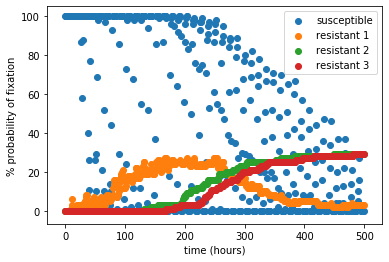

The susceptible bacteria are no longer present at  38 hours
The first resistant bacteria never appear
The second resistant bacteria never appear
The third resistant bacteria never appear


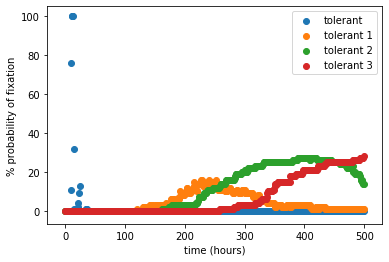

The susceptible tolerant bacteria are present between 10 and 14 hours
The first tolerant bacteria never appear
The second tolerant bacteria never appear
The third tolerant bacteria never appear


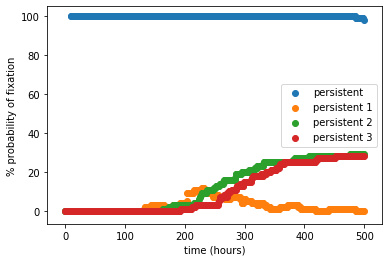

The susceptible persistent bacteria are present between 9 and 0 hours
The susceptible persistent bacteria are present from 9 hours to the end of the treatment.
The first persistent bacteria never appear
The second persistent bacteria never appear
The third persistent bacteria never appear
Average weighted MIC =  18.091096103119476
Average weighted MDK =  1.0000001289865679


In [76]:
times = np.arange(0,time,dtime)
plt.figure()
plt.scatter(times,scounts,label="susceptible")
plt.scatter(times,r1counts,label="resistant 1")
plt.scatter(times,r2counts,label="resistant 2")
plt.scatter(times,r3counts,label="resistant 3")
plt.xlabel("time (hours)")
plt.ylabel("% probability of fixation")
plt.legend()
plt.show()

sstart = 0
send = 0
r1start = 0
r1end = 0
r2start = 0
r2end = 0
r3start = 0
r3end = 0

for i in range(sstart, len(scounts)):
    if scounts[i] < 50:
        send = i
        print("The susceptible bacteria are no longer present at ", send, "hours")
        break
if send == 0:
    print("The susceptible bacteria are present to the end of the treatment.")


for i in range(len(r1counts)):
    if r1counts[i] > 50:
        r1start = i
        break
if r1start > 0:
    for i in range(r1start, len(r1counts)):
        if r1counts[i] < 50:
            r1end = i
            print("The first resistant bacteria are present between", r1start, "and", r1end, "hours")
            break
if r1start == 0:
    print("The first resistant bacteria never appear")
elif r1end == 0:
    print("The first resistant bacteria are present from", r1start, "hours to the end of the treatment.")

for i in range(len(r2counts)):
    if r2counts[i] > 50:
        r2start = i
        break
if r2start > 0:
    for i in range(r2start, len(r2counts)):
        if r2counts[i] < 50:
            r2end = i
            print("The second resistant bacteria are present between", r2start, "and", r2end, "hours")
            break
if r2start == 0:
    print("The second resistant bacteria never appear")
elif r2end == 0:
    print("The second resistant bacteria are present from", r2start, "hours to the end of the treatment.")


for i in range(len(r3counts)):
    if r3counts[i] > 50:
        r3start = i
        break
if r3start > 0:
    for i in range(r3start, len(r3counts)):
        if r3counts[i] < 50:
            r3end = i
            print("The third resistant bacteria are present between", r3start, "and", r3end, "hours")
            break
if r3start == 0:
    print("The third resistant bacteria never appear")
elif r3end == 0:
    print("The third resistant bacteria are present from", r3start, "hours to the end of the treatment.")

plt.figure()
plt.scatter(times,tolcounts,label="tolerant")
plt.scatter(times,tolr1counts,label="tolerant 1")
plt.scatter(times,tolr2counts,label="tolerant 2")
plt.scatter(times,tolr3counts,label="tolerant 3")
plt.xlabel("time (hours)")
plt.ylabel("% probability of fixation")
plt.legend()
plt.show() 

tolstart = 0
tolend = 0
tolr1start = 0
tolr1end = 0
tolr2start = 0
tolr2end = 0
tolr3start = 0
tolr3end = 0

for i in range(len(tolcounts)):
    if tolcounts[i] > 50:
        tolstart = i
        break
if tolstart > 0:
    for i in range(tolstart, len(tolcounts)):
        if tolcounts[i] < 50:
            tolend = i
            print("The susceptible tolerant bacteria are present between", tolstart, "and", tolend, "hours")
            break
if tolstart == 0:
    print("The susceptible tolerant bacteria never appear")
elif tolend == 0:
    print("The susceptible tolerant bacteria are present from", tolstart, "hours to the end of the treatment.")


for i in range(len(tolr1counts)):
    if tolr1counts[i] > 50:
        tolr1start = i
        break
if tolr1start > 0:
    for i in range(tolr1start, len(tolr1counts)):
        if tolr1counts[i] < 50:
            tolr1end = i
            print("The first tolerant bacteria are present between", tolr1start, "and", tolr1end, "hours")
            break
if tolr1start == 0:
    print("The first tolerant bacteria never appear")
elif tolr1end == 0:
    print("The first tolerant bacteria are present from", tolr1start, "hours to the end of the treatment.")

for i in range(len(tolr2counts)):
    if tolr2counts[i] > 50:
        tolr2start = i
        break
if tolr2start > 0:
    for i in range(tolr2start, len(tolr2counts)):
        if tolr2counts[i] < 50:
            tolr2end = i
            print("The second tolerant bacteria are present between", tolr2start, "and", tolr2end, "hours")
            break
if tolr2start == 0:
    print("The second tolerant bacteria never appear")
elif tolr2end == 0:
    print("The second tolerant bacteria are present from", tolr2start, "hours to the end of the treatment.")


for i in range(len(tolr3counts)):
    if tolr3counts[i] > 50:
        tolr3start = i
        break
if tolr3start > 0:
    for i in range(tolr3start, len(tolr3counts)):
        if tolr3counts[i] < 50:
            tolr3end = i
            print("The third tolerant bacteria are present between", tolr3start, "and", tolr3end, "hours")
            break
if tolr3start == 0:
    print("The third tolerant bacteria never appear")
elif tolr3end == 0:
    print("The third tolerant bacteria are present from", tolr3start, "hours to the end of the treatment.")

plt.figure()
plt.scatter(times,pscounts,label="persistent")
plt.scatter(times,pr1counts,label="persistent 1")
plt.scatter(times,pr2counts,label="persistent 2")
plt.scatter(times,pr3counts,label="persistent 3")
plt.xlabel("time (hours)")
plt.ylabel("% probability of fixation")
plt.legend()
plt.show() 

psstart = 0
psend = 0
pr1start = 0
pr1end = 0
pr2start = 0
pr2end = 0
pr3start = 0
pr3end = 0

for i in range(len(pscounts)):
    if pscounts[i] > 50:
        psstart = i
        break
if psstart > 0:
    for i in range(r1start, len(pscounts)):
        if pscounts[i] < 50:
            psend = i
            print("The susceptible persistent bacteria are present between", psstart, "and", psend, "hours")
            break
if psstart == 0:
    print("The susceptible persistent bacteria never appear")
elif psend == 0:
    print("The susceptible persistent bacteria are present from", psstart, "hours to the end of the treatment.")


for i in range(len(pr1counts)):
    if pr1counts[i] > 50:
        pr1start = i
        break
if pr1start > 0:
    for i in range(pr1start, len(pr1counts)):
        if pr1counts[i] < 50:
            pr1end = i
            print("The first persistent bacteria are present between", pr1start, "and", pr1end, "hours")
            break
if pr1start == 0:
    print("The first persistent bacteria never appear")
elif pr1end == 0:
    print("The first persistent bacteria are present from", pr1start, "hours to the end of the treatment.")

for i in range(len(pr2counts)):
    if pr2counts[i] > 50:
        pr2start = i
        break
if pr2start > 0:
    for i in range(pr2start, len(pr2counts)):
        if pr2counts[i] < 50:
            pr2end = i
            print("The second persistent bacteria are present between", pr2start, "and", pr2end, "hours")
            break
if pr2start == 0:
    print("The second persistent bacteria never appear")
elif pr2end == 0:
    print("The second persistent bacteria are present from", pr2start, "hours to the end of the treatment.")


for i in range(len(pr3counts)):
    if pr3counts[i] > 50:
        pr3start = i
        break
if pr3start > 0:
    for i in range(pr3start, len(pr3counts)):
        if pr3counts[i] < 50:
            pr3end = i
            print("The third persistent bacteria are present between", pr3start, "and", pr3end, "hours")
            break
if pr3start == 0:
    print("The third persistent bacteria never appear")
elif pr3end == 0:
    print("The third persistent bacteria are present from", pr3start, "hours to the end of the treatment.")

print("Average weighted MIC = ", sum(weightedMICs)/len(weightedMICs))
print("Average weighted MDK = ", sum(weightedMDKs)/len(weightedMDKs))

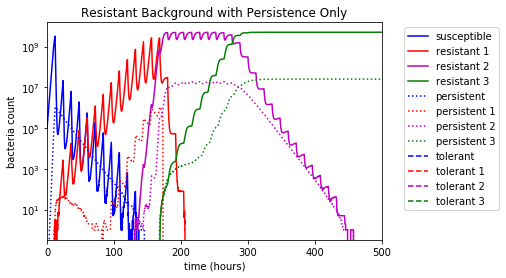

In [72]:
# PERSISTENCE ONLY

r1 = [r_initial]*len(t)
r2 = [r_initial]*len(t)
r3 = [r_initial]*len(t)
s = [s_initial]*len(t)
tol = [t_initial]*len(t)
ps = [p_initial]*len(t)
pr1 = [p_initial]*len(t)
pr2 = [p_initial]*len(t)
pr3 = [p_initial]*len(t)
tolr1 = [0]*len(t)
tolr2 = [0]*len(t)
tolr3 = [0]*len(t)
totaltol = [0]*len(t)
totalr = [0]*len(t)
totalp = [0]*len(t)
t_lag = 0
K = 5*10**9
mean_sr = [0]*len(t)
mean_st = [0]*len(t)
mean_sp = [0]*len(t)
mean_ps = [0]*len(t)
mean_pr = [0]*len(t)
mu_sr1 = [0]*len(t)
mu_sr2 = [0]*len(t)
mu_sr3 = [0]*len(t)
mu_pr1 = [0]*len(t)
mu_pr2 = [0]*len(t)
mu_pr3 = [0]*len(t)
mu_sp = [0]*len(t)
mu_sp1 = [0]*len(t)
mu_sp2 = [0]*len(t)
mu_sp3 = [0]*len(t)
mu_ps = [0]*len(t)
mu_ps1 = [0]*len(t)
mu_ps2 = [0]*len(t)
mu_ps3 = [0]*len(t)

def growth_rate_r1(c):
    return max_growth_r1
def growth_rate_r2(c):
    return max_growth_r2
def growth_rate_r3(c):
    return max_growth_r3
def growth_rate_s(c):
    return max_growth_s 
def death_rate_r1(c):
    return (((max_growth_r1 - min_growth)*((c/MIC_r1)**k))/(((c/MIC_r1)**k)-(min_growth/max_growth_r1)))
def death_rate_r2(c):
    return (((max_growth_r2 - min_growth)*((c/MIC_r2)**k))/(((c/MIC_r2)**k)-(min_growth/max_growth_r2)))
def death_rate_r3(c):
    return (((max_growth_r3 - min_growth)*((c/MIC_r3)**k))/(((c/MIC_r3)**k)-(min_growth/max_growth_r3)))
def death_rate_s(c):
    return (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))
def mut_frequency(c):
    mu_basal = 2.15*10**-10 # basal mutation rate
    m = 5 # max fold increase in mutation rate
    h = 2.5 # steepness of curve
    return mu_basal + (1-np.exp(-h*c))*(m-1)*mu_basal

# the mutation frequency increases with antibiotic concentration, but 
# the number of susceptible bacteria also declines, so it's a tradeoff

def simulation_p(seed):
    np.random.seed(seed)
    for i in range(len(t)-1):
    # 1/generation time
        g_r1 = growth_rate_r1(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r1 = death_rate_r1(conc(i*dt))
        g_r2 = growth_rate_r2(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r2 = death_rate_r2(conc(i*dt))
        g_r3 = growth_rate_r3(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r3 = death_rate_r3(conc(i*dt))
        g_s = growth_rate_s(conc(i*dt))
        d_s = death_rate_s(conc(i*dt))
        totalr[i] = r1[i] + r2[i] + r3[i] + pr1[i] + pr2[i] + pr3[i]
        totalp[i] = ps[i] + pr1[i] + pr2[i] + pr3[i]
        N = r1[i] + r2[i] + r3[i] + ps[i] + pr1[i] + pr2[i] + pr3[i] + s[i]
        mean_sr[i] = abs(dt*(mut_frequency(conc(i*dt)))*g_s*(1-N/K))
        mean_st[i] = abs(50*dt*(mut_frequency(conc(i*dt)))*g_s*(1-N/K))
        mean_sp[i] = abs(dt*0.0005*(N/K)) 
        mean_ps[i] = abs(dt*0.1)
        mean_pr[i] = abs(10**4*dt*mut_frequency(conc(i*dt)))
        mu_sr1[i] = mean_sr[i]*s[i]
        mu_sr2[i] = mean_sr[i]*r1[i]
        mu_sr3[i] = mean_sr[i]*r2[i]
        mu_pr1[i] = mean_pr[i]*ps[i]
        mu_pr2[i] = mean_pr[i]*pr1[i]
        mu_pr3[i] = mean_pr[i]*pr2[i]
        mu_sp[i] = mean_sp[i]*s[i]
        mu_sp1[i] = mean_sp[i]*r1[i]
        mu_sp2[i] = mean_sp[i]*r2[i]
        mu_sp3[i] = mean_sp[i]*r3[i]
        mu_ps[i] = mean_ps[i]*ps[i]
        mu_ps1[i] = mean_ps[i]*pr1[i]
        mu_ps2[i] = mean_ps[i]*pr2[i]
        mu_ps3[i] = mean_ps[i]*pr3[i]
# change in population from regular growth
        if r1[i]*(1-(N/K))*(g_r1*dt) > 0: 
            if r1[i]*(1-(N/K))*(g_r1*dt) - d_r1*r1[i]*dt > -r1[i] and r1[i] >= 1: 
                r1[i+1] = (r1[i] + np.random.poisson(r1[i]*(1-(N/K))*(g_r1*dt)) - np.random.poisson(d_r1*r1[i]*dt))
            else:
                r1[i+1] = 0
        elif d_r1*r1[i]*dt > 0:
            r1[i+1] = r1[i] - np.random.poisson(d_r1*r1[i]*dt)
        else:
            r1[i+1] = r1[i]
        if r2[i]*(1-(N/K))*(g_r2*dt) > 0: 
            if r2[i]*(1-(N/K))*(g_r2*dt) - d_r2*r2[i]*dt > -r2[i] and r2[i] >= 1: 
                r2[i+1] = (r2[i] + np.random.poisson(r2[i]*(1-(N/K))*(g_r2*dt)) - np.random.poisson(d_r2*r2[i]*dt))
            else:
                r2[i+1] = 0
        elif d_r2*r2[i]*dt > 0:
            r2[i+1] = r2[i] - np.random.poisson(d_r2*r2[i]*dt)
        else:
            r2[i+1] = r2[i]
        if r3[i]*(1-(N/K))*(g_r3*dt) > 0: 
            if r3[i]*(1-(N/K))*(g_r3*dt) - d_r3*r3[i]*dt > -r3[i] and r3[i] >= 1: 
                r3[i+1] = (r3[i] + np.random.poisson(r3[i]*(1-(N/K))*(g_r3*dt)) - np.random.poisson(d_r3*r3[i]*dt))
            else:
                r3[i+1] = 0
        elif d_r3*r3[i]*dt > 0:
            r3[i+1] = r3[i] - np.random.poisson(d_r3*r3[i]*dt)
        else:
            r3[i+1] = r3[i]
        if s[i]*(1-(N/K))*(g_s*dt) > 0:
            if (np.random.poisson(s[i]*(1-(N/K))*(g_s*dt)) - np.random.poisson(abs(d_s*s[i]*dt))) > -s[i] and s[i] >= 1:
                s[i+1] = s[i] + np.random.poisson(s[i]*(1-(N/K))*(g_s*dt)) - np.random.poisson(abs(d_s*s[i]*dt))
            else:
                s[i+1] = 0
        elif d_s*s[i]*dt > 0:
            s[i+1] = s[i] - np.random.poisson(d_s*s[i]*dt)
        else:
            s[i+1] = s[i]
        ps[i+1] = ps[i] # no growth or death for persistent bacteria
        pr1[i+1] = pr1[i]
        pr2[i+1] = pr2[i]
        pr3[i+1] = pr3[i]
# change in population from mutations 
        try:
            s[i+1] += (np.random.poisson(mu_ps[i]))
        except: pass
        try:
            s[i+1] -= np.random.poisson(mu_sr1[i])
        except: pass
        try:
            s[i+1] -= np.random.poisson(mu_sp[i])
        except: pass
        try:
            r1[i+1] += (np.random.poisson(mu_sr1[i]))
        except: pass
        try:
            r1[i+1] += np.random.poisson(mu_ps1[i])
        except: pass
        try:
            r1[i+1] -= np.random.poisson(mu_sr2[i])
        except: pass
        try:
            r1[i+1] -= np.random.poisson(mu_sp1[i])
        except: pass
        try:
            r2[i+1] += (np.random.poisson(mu_sr2[i]))
        except: pass
        try:
            r2[i+1] += np.random.poisson(mu_ps2[i])
        except: pass
        try:
            r2[i+1] -= np.random.poisson(mu_sr3[i])
        except: pass
        try: 
            r2[i+1] -= np.random.poisson(mu_sp2[i])
        except: pass
        try: 
            r3[i+1] += (np.random.poisson(mu_sr3[i]))
        except: pass
        try: 
            r3[i+1] += np.random.poisson(mu_ps3[i])
        except: pass
        try: 
            r3[i+1] -= np.random.poisson(mu_st3[i])
        except: pass
        try: 
            r3[i+1] -= np.random.poisson(mu_sp3[i])
        except: pass
        try:
            ps[i+1] += (np.random.poisson(mu_sp[i]))
        except: pass
        try:
            ps[i+1] -= np.random.poisson(mu_ps[i])
        except: pass
        try:
            ps[i+1] -= np.random.poisson(mu_pr1[i])
        except: pass
        try:
            pr1[i+1] += (np.random.poisson(mu_pr1[i]))
        except: pass
        try:
            pr1[i+1] += np.random.poisson(mu_sp1[i])
        except: pass
        try:
            pr1[i+1] -= np.random.poisson(mu_sp2[i])
        except: pass
        try:
            pr1[i+1] -= np.random.poisson(mu_ps1[i])
        except: pass
        try:
            pr2[i+1] += np.random.poisson(mu_pr2[i])
        except: pass
        try:
            pr2[i+1] += np.random.poisson(mu_sp2[i])
        except: pass
        try:
            pr2[i+1] -= np.random.poisson(mu_pr3[i])
        except: pass
        try:
            pr2[i+1] -= np.random.poisson(mu_ps2[i])
        except: pass
        try:
            pr3[i+1] += (np.random.poisson(mu_pr3[i]))
        except: pass
        try:
            pr3[i+1] += np.random.poisson(mu_sp3[i])
        except: pass
        try:
            pr3[i+1] -= np.random.poisson(mu_ps3[i])
        except: pass
        
# tolerant/persistent bacteria have been shown to have mutation rates 10^4 fold that of susceptible
# Levin Reisman paper showed that tolerance mutations are around 50 times more common than resistant

# solve models
simulation_p(11)

# plot results
plt.figure()
# plt.plot(t,totalr,label="resistant")
plt.plot(t,s,label="susceptible",color='b',linestyle='solid')
plt.plot(t,r1,label="resistant 1",color='r',linestyle='solid')
plt.plot(t,r2,label="resistant 2",color='m',linestyle='solid')
plt.plot(t,r3,label="resistant 3",color='g',linestyle='solid')
# plt.plot(t,totalp,label="persistent")
plt.plot(t,ps,label="persistent",color='b',linestyle='dotted')
plt.plot(t,pr1,label="persistent 1",color='r',linestyle='dotted')
plt.plot(t,pr2,label="persistent 2",color='m',linestyle='dotted')
plt.plot(t,pr3,label="persistent 3",color='g',linestyle='dotted')
# plt.plot(t,totaltol,label="tolerant")
plt.plot(t,tol,label="tolerant",color='b',linestyle='dashed')
plt.plot(t,tolr1,label="tolerant 1",color='r',linestyle='dashed')
plt.plot(t,tolr2,label="tolerant 2",color='m',linestyle='dashed')
plt.plot(t,tolr3,label="tolerant 3",color='g',linestyle='dashed')
plt.xlabel('time (hours)')
plt.xlim(0,T)
plt.ylabel('bacteria count')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.title("Resistant Background with Persistence Only")
plt.show()

In [65]:
time = 500
dtime = 1
times = np.arange(0,time,dtime)
scounts = [0]*int(time/dtime)
r1counts = [0]*int(time/dtime)
r2counts = [0]*int(time/dtime)
r3counts = [0]*int(time/dtime)
tolcounts = [0]*int(time/dtime)
tolr1counts = [0]*int(time/dtime)
tolr2counts = [0]*int(time/dtime)
tolr3counts = [0]*int(time/dtime)
pscounts = [0]*int(time/dtime)
pr1counts = [0]*int(time/dtime)
pr2counts = [0]*int(time/dtime)
pr3counts = [0]*int(time/dtime)
weightedMICs = []
weightedMDKs = []
def present_probability_rp(runs,time,dtime):
    for q in range(runs):
        simulation_tp(q)
        for i in range(int(time/dtime)):
            if s[100*dtime*i] > 10:
                scounts[i] += 1
            if r1[100*dtime*i] > 10:
                r1counts[i] += 1
            if r2[100*dtime*i] > 10:
                r2counts[i] += 1
            if r3[100*dtime*i] > 10:
                r3counts[i] += 1
            if ps[100*dtime*i] > 10:
                pscounts[i] += 1
            if pr1[100*dtime*i] > 10:
                pr1counts[i] += 1
            if pr2[100*dtime*i] > 10:
                pr2counts[i] += 1
            if pr3[100*dtime*i] > 10:
                pr3counts[i] += 1
        totalBacteria = s[-1]+tol[-1]+ps[-1]+r1[-1]+tolr1[-1]+pr1[-1]+r2[-1]+tolr2[-1]+pr2[-1]+r3[-1]+tolr3[-1]+pr3[-1]
        totalMICs = s[-1]+tol[-1]+ps[-1]
        totalMIC1 = r1[-1]+tolr1[-1]+pr1[-1]
        totalMIC2 = r2[-1]+tolr2[-1]+pr2[-1]
        totalMIC3 = r3[-1]+tolr3[-1]+pr3[-1]
        weightedMIC = (totalMICs/totalBacteria)*MIC + (totalMIC1/totalBacteria)*MIC_r1 + (totalMIC2/totalBacteria)*MIC_r2 + (totalMIC3/totalBacteria)*MIC_r3
        weightedMDK = ((tol[-1]+tolr1[-1]+tolr2[-1]+tolr3[-1])/totalBacteria)*MDK + (totalBacteria-(tol[-1]+tolr1[-1]+tolr2[-1]+tolr3[-1]))/totalBacteria
        weightedMICs.append(weightedMIC)
        weightedMDKs.append(weightedMDK)
present_probability_rp(100,time,dtime)

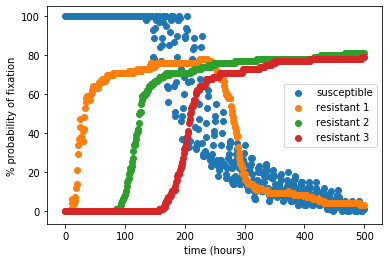

The susceptible bacteria are no longer present at  183 hours
The first resistant bacteria are present between 33 and 280 hours
The second resistant bacteria are present from 125 hours to the end of the treatment.
The third resistant bacteria are present from 210 hours to the end of the treatment.


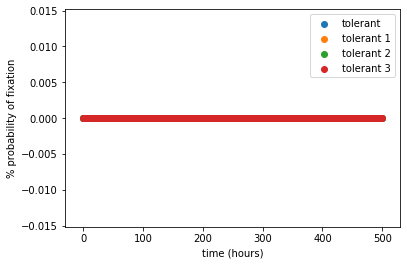

The susceptible tolerant bacteria never appear
The susceptible tolerant bacteria are present from 0 hours to the end of the treatment.
The first tolerant bacteria never appear
The first tolerant bacteria are present from 0 hours to the end of the treatment.
The second tolerant bacteria never appear
The second tolerant bacteria are present from 0 hours to the end of the treatment.
The third tolerant bacteria never appear
The third tolerant bacteria are present from 0 hours to the end of the treatment.


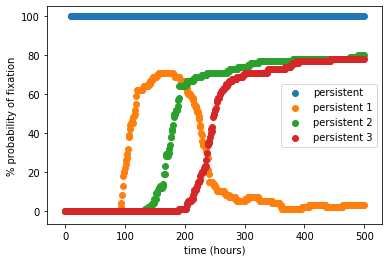

The susceptible persistent bacteria are present from 9 hours to the end of the treatment.
The first persistent bacteria are present between 117 and 223 hours
The second persistent bacteria are present from 185 hours to the end of the treatment.
The third persistent bacteria are present from 250 hours to the end of the treatment.
Average weighted MIC =  50.431204208713716
Average weighted MDK =  1.0000100563208516


In [66]:
time = 500
dtime = 1
times = np.arange(0,time,dtime)
scounts = [0]*int(time/dtime)
r1counts = [0]*int(time/dtime)
r2counts = [0]*int(time/dtime)
r3counts = [0]*int(time/dtime)
tolcounts = [0]*int(time/dtime)
tolr1counts = [0]*int(time/dtime)
tolr2counts = [0]*int(time/dtime)
tolr3counts = [0]*int(time/dtime)
pscounts = [0]*int(time/dtime)
pr1counts = [0]*int(time/dtime)
pr2counts = [0]*int(time/dtime)
pr3counts = [0]*int(time/dtime)
weightedMICs = []
weightedMDKs = []
def present_probability_rtp(runs,time,dtime):
    for q in range(runs):
        simulation_tp(q)
        for i in range(int(time/dtime)):
            if s[100*dtime*i] > 10:
                scounts[i] += 1
            if r1[100*dtime*i] > 10:
                r1counts[i] += 1
            if r2[100*dtime*i] > 10:
                r2counts[i] += 1
            if r3[100*dtime*i] > 10:
                r3counts[i] += 1
            if tol[100*dtime*i] > 10:
                tolcounts[i] += 1
            if tolr1[100*dtime*i] > 10:
                tolr1counts[i] += 1
            if tolr2[100*dtime*i] > 10:
                tolr2counts[i] += 1
            if tolr3[100*dtime*i] > 10:
                tolr3counts[i] += 1
            if ps[100*dtime*i] > 10:
                pscounts[i] += 1
            if pr1[100*dtime*i] > 10:
                pr1counts[i] += 1
            if pr2[100*dtime*i] > 10:
                pr2counts[i] += 1
            if pr3[100*dtime*i] > 10:
                pr3counts[i] += 1
        totalBacteria = s[-1]+tol[-1]+ps[-1]+r1[-1]+tolr1[-1]+pr1[-1]+r2[-1]+tolr2[-1]+pr2[-1]+r3[-1]+tolr3[-1]+pr3[-1]
        totalMICs = s[-1]+tol[-1]+ps[-1]
        totalMIC1 = r1[-1]+tolr1[-1]+pr1[-1]
        totalMIC2 = r2[-1]+tolr2[-1]+pr2[-1]
        totalMIC3 = r3[-1]+tolr3[-1]+pr3[-1]
        weightedMIC = (totalMICs/totalBacteria)*MIC + (totalMIC1/totalBacteria)*MIC_r1 + (totalMIC2/totalBacteria)*MIC_r2 + (totalMIC3/totalBacteria)*MIC_r3
        weightedMDK = ((tol[-1]+tolr1[-1]+tolr2[-1]+tolr3[-1])/totalBacteria)*MDK + (totalBacteria-(tol[-1]+tolr1[-1]+tolr2[-1]+tolr3[-1]))/totalBacteria
        weightedMICs.append(weightedMIC)
        weightedMDKs.append(weightedMDK)
present_probability_rtp(100,time,dtime)

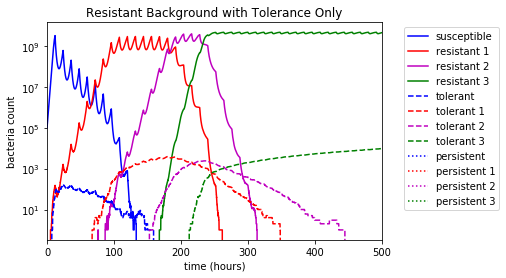

In [24]:
# TOLERANCE ONLY

r1 = [r_initial]*len(t)
r2 = [r_initial]*len(t)
r3 = [r_initial]*len(t)
s = [s_initial]*len(t)
tol = [t_initial]*len(t)
ps = [p_initial]*len(t)
pr1 = [p_initial]*len(t)
pr2 = [p_initial]*len(t)
pr3 = [p_initial]*len(t)
tolr1 = [0]*len(t)
tolr2 = [0]*len(t)
tolr3 = [0]*len(t)
totaltol = [0]*len(t)
totalr = [0]*len(t)
totalp = [0]*len(t)
t_lag = 0
K = 5*10**9
mean_sr = [0]*len(t)
mean_tr = [0]*len(t)
mean_st = [0]*len(t)
mean_sp = [0]*len(t)
mean_ps = [0]*len(t)
mean_pr = [0]*len(t)
mu_tr1 = [0]*len(t)
mu_tr2 = [0]*len(t)
mu_tr3 = [0]*len(t)
mu_sr1 = [0]*len(t)
mu_sr2 = [0]*len(t)
mu_sr3 = [0]*len(t)
mu_st = [0]*len(t)
mu_st1 = [0]*len(t)
mu_st2 = [0]*len(t)
mu_st3 = [0]*len(t)
mu_pr1 = [0]*len(t)
mu_pr2 = [0]*len(t)
mu_pr3 = [0]*len(t)
mu_sp = [0]*len(t)
mu_sp1 = [0]*len(t)
mu_sp2 = [0]*len(t)
mu_sp3 = [0]*len(t)
mu_ps = [0]*len(t)
mu_ps1 = [0]*len(t)
mu_ps2 = [0]*len(t)
mu_ps3 = [0]*len(t)

def growth_rate_r1(c):
    return max_growth_r1
def growth_rate_r2(c):
    return max_growth_r2
def growth_rate_r3(c):
    return max_growth_r3
def growth_rate_s(c):
    return max_growth_s 
def growth_rate_t(c):
    return max_growth_r1/MDK
def growth_rate_tolr1(c):
    return max_growth_r2/MDK
def growth_rate_tolr2(c):
    return max_growth_r3/MDK
def growth_rate_tolr3(c):
    return max_growth_s/MDK
def death_rate_r1(c):
    return (((max_growth_r1 - min_growth)*((c/MIC_r1)**k))/(((c/MIC_r1)**k)-(min_growth/max_growth_r1)))
def death_rate_r2(c):
    return (((max_growth_r2 - min_growth)*((c/MIC_r2)**k))/(((c/MIC_r2)**k)-(min_growth/max_growth_r2)))
def death_rate_r3(c):
    return (((max_growth_r3 - min_growth)*((c/MIC_r3)**k))/(((c/MIC_r3)**k)-(min_growth/max_growth_r3)))
def death_rate_s(c):
    return (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))
def death_rate_t(c):
    return (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))/MDK
def death_rate_tolr1(c):
    return (((max_growth_r1 - min_growth)*(c/MIC_r1)**k)/(((c/MIC_r1)**k)-(min_growth/max_growth_r1)))/MDK
def death_rate_tolr2(c):
    return (((max_growth_r2 - min_growth)*(c/MIC_r2)**k)/(((c/MIC_r2)**k)-(min_growth/max_growth_r2)))/MDK
def death_rate_tolr3(c):
    return (((max_growth_r3 - min_growth)*(c/MIC_r3)**k)/(((c/MIC_r3)**k)-(min_growth/max_growth_r3)))/MDK
def mut_frequency(c):
    mu_basal = 2.15*10**-10 # basal mutation rate
    m = 5 # max fold increase in mutation rate
    h = 2.5 # steepness of curve
    return mu_basal + (1-np.exp(-h*c))*(m-1)*mu_basal
# the mutation frequency increases with antibiotic concentration, but 
# the number of susceptible bacteria also declines, so it's a tradeoff

def simulation_tp(seed):
    np.random.seed(seed)
    for i in range(len(t)-1):
    # 1/generation time
        g_r1 = growth_rate_r1(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r1 = death_rate_r1(conc(i*dt))
        g_r2 = growth_rate_r2(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r2 = death_rate_r2(conc(i*dt))
        g_r3 = growth_rate_r3(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r3 = death_rate_r3(conc(i*dt))
        g_s = growth_rate_s(conc(i*dt))
        d_s = death_rate_s(conc(i*dt))
        g_t = growth_rate_t(conc(i*dt))
        d_t = death_rate_t(conc(i*dt))
        g_tolr1 = growth_rate_tolr1(conc(i*dt))
        d_tolr1 = death_rate_tolr1(conc(i*dt))
        g_tolr2 = growth_rate_tolr2(conc(i*dt))
        d_tolr2 = death_rate_tolr2(conc(i*dt))
        g_tolr3 = growth_rate_tolr3(conc(i*dt))
        d_tolr3 = death_rate_tolr3(conc(i*dt))
        totaltol[i] = tol[i] + tolr1[i] + tolr2[i] + tolr3[i]
        totalr[i] = r1[i] + r2[i] + r3[i] + tolr1[i] + tolr2[i] + tolr3[i] + pr1[i] + pr2[i] + pr3[i]
        N = tol[i] + tolr1[i] + tolr2[i] + tolr3[i] + r1[i] + r2[i] + r3[i] + s[i]
        mean_tr[i] = abs((10**4)*dt*(mut_frequency(conc(i*dt))*g_t*(1-N/K)))
        mean_sr[i] = abs(dt*(mut_frequency(conc(i*dt)))*g_s*(1-N/K))
        mean_st[i] = abs(50*dt*(mut_frequency(conc(i*dt)))*g_s*(1-N/K))
        mu_tr1[i] = mean_tr[i]*tol[i]
        mu_tr2[i] = mean_tr[i]*tolr1[i]
        mu_tr3[i] = mean_tr[i]*tolr2[i]
        mu_sr1[i] = mean_sr[i]*s[i]
        mu_sr2[i] = mean_sr[i]*r1[i]
        mu_sr3[i] = mean_sr[i]*r2[i]
        mu_st[i] = mean_st[i]*s[i]
        mu_st1[i] = mean_st[i]*r1[i]
        mu_st2[i] = mean_st[i]*r2[i]
        mu_st3[i] = mean_st[i]*r3[i]
# change in population from regular growth
        if r1[i]*(1-(N/K))*(g_r1*dt) > 0: 
            if r1[i]*(1-(N/K))*(g_r1*dt) - d_r1*r1[i]*dt > -r1[i] and r1[i] >= 1: 
                r1[i+1] = (r1[i] + np.random.poisson(r1[i]*(1-(N/K))*(g_r1*dt)) - np.random.poisson(d_r1*r1[i]*dt))
            else:
                r1[i+1] = 0
        elif d_r1*r1[i]*dt > 0:
            r1[i+1] = r1[i] - np.random.poisson(d_r1*r1[i]*dt)
        else:
            r1[i+1] = r1[i]
        if r2[i]*(1-(N/K))*(g_r2*dt) > 0: 
            if r2[i]*(1-(N/K))*(g_r2*dt) - d_r2*r2[i]*dt > -r2[i] and r2[i] >= 1: 
                r2[i+1] = (r2[i] + np.random.poisson(r2[i]*(1-(N/K))*(g_r2*dt)) - np.random.poisson(d_r2*r2[i]*dt))
            else:
                r2[i+1] = 0
        elif d_r2*r2[i]*dt > 0:
            r2[i+1] = r2[i] - np.random.poisson(d_r2*r2[i]*dt)
        else:
            r2[i+1] = r2[i]
        if r3[i]*(1-(N/K))*(g_r3*dt) > 0: 
            if r3[i]*(1-(N/K))*(g_r3*dt) - d_r3*r3[i]*dt > -r3[i] and r3[i] >= 1: 
                r3[i+1] = (r3[i] + np.random.poisson(r3[i]*(1-(N/K))*(g_r3*dt)) - np.random.poisson(d_r3*r3[i]*dt))
            else:
                r3[i+1] = 0
        elif d_r3*r3[i]*dt > 0:
            r3[i+1] = r3[i] - np.random.poisson(d_r3*r3[i]*dt)
        else:
            r3[i+1] = r3[i]
        if tolr1[i]*(1-(N/K))*(g_tolr1*dt) > 0: 
            if (tolr1[i]*(1-(N/K))*(g_tolr1*dt)) - d_tolr1*tolr1[i]*dt > -tolr1[i] and tolr1[i] >= 1:
                tolr1[i+1] = tolr1[i] + np.random.poisson(tolr1[i]*(1-(N/K))*(g_tolr1*dt)) - np.random.poisson(d_tolr1*tolr1[i]*dt)
            else:
                tolr1[i+1] = 0
        elif d_tolr1*tolr1[i]*dt > 0:
            tolr1[i+1] = tolr1[i] - np.random.poisson(d_tolr1*tolr1[i]*dt)
        else:
            tolr1[i+1] = tolr1[i]
        if tolr2[i]*(1-(N/K))*(g_tolr2*dt) > 0: 
            if (tolr2[i]*(1-(N/K))*(g_tolr2*dt)) - d_tolr2*tolr2[i]*dt > -tolr2[i] and tolr2[i] >= 1:
                tolr2[i+1] = tolr2[i] + np.random.poisson(tolr2[i]*(1-(N/K))*(g_tolr2*dt)) - np.random.poisson(d_tolr2*tolr2[i]*dt)
            else:
                tolr2[i+1] = 0
        elif d_tolr2*tolr2[i]*dt > 0:
            tolr2[i+1] = tolr2[i] - np.random.poisson(d_tolr2*tolr2[i]*dt)
        else:
            tolr2[i+1] = tolr2[i]
        if tolr3[i]*(1-(N/K))*(g_tolr3*dt) > 0: 
            if (tolr3[i]*(1-(N/K))*(g_tolr3*dt)) - d_tolr3*tolr3[i]*dt > -tolr3[i] and tolr3[i] >= 1:
                tolr3[i+1] = tolr3[i] + np.random.poisson(tolr3[i]*(1-(N/K))*(g_tolr3*dt)) - np.random.poisson(d_tolr3*tolr3[i]*dt)
            else:
                tolr3[i+1] = 0
        elif d_tolr3*tolr3[i]*dt > 0:
            tolr3[i+1] = tolr3[i] - np.random.poisson(d_tolr3*tolr3[i]*dt)
        else:
            tolr3[i+1] = tolr3[i]
        if s[i]*(1-(N/K))*(g_s*dt) > 0:
            if (np.random.poisson(s[i]*(1-(N/K))*(g_s*dt)) - np.random.poisson(abs(d_s*s[i]*dt))) > -s[i] and s[i] >= 1:
                s[i+1] = s[i] + np.random.poisson(s[i]*(1-(N/K))*(g_s*dt)) - np.random.poisson(abs(d_s*s[i]*dt))
            else:
                s[i+1] = 0
        elif d_s*s[i]*dt > 0:
            s[i+1] = s[i] - np.random.poisson(d_s*s[i]*dt)
        else:
            s[i+1] = s[i]
        if i*dt>t_lag:
            if tol[i]*(1-(N/K))*(g_t*dt) > 0:
                if (tol[i]*(1-(N/K))*(g_t*dt)) - d_t*tol[i]*dt > -tol[i] and tol[i] >= 1:
                    tol[i+1] = tol[i] + np.random.poisson(tol[i]*(1-(N/K))*(g_t*dt)) - np.random.poisson(d_t*tol[i]*dt)
                else:
                    tol[i+1] = 0
            elif d_t*tol[i]*dt > 0:
                tol[i+1] = tol[i] - np.random.poisson(d_t*tol[i]*dt)
            else:
                tol[i+1] = tol[i]
        else:
            tol[i+1] = tol[i]
# change in population from mutations 
        try:
            s[i+1] += (- np.random.poisson(mu_sr1[i]) - np.random.poisson(mu_st[i]))
        except:
            pass
        try:
            r1[i+1] += (np.random.poisson(mu_sr1[i]) - np.random.poisson(mu_st1[i]) - np.random.poisson(mu_sr2[i]))
        except:
            pass
        try:
            r2[i+1] += (np.random.poisson(mu_sr2[i]) + - np.random.poisson(mu_st2[i]) - np.random.poisson(mu_sr3[i]))
        except:
            pass
        try:
            r3[i+1] += (np.random.poisson(mu_sr3[i]))
        except:
            pass
        try:
            tol[i+1] += (-np.random.poisson(mu_tr1[i]) + np.random.poisson(mu_st[i]))
        except:
            pass
        try:
            tolr1[i+1] += (np.random.poisson(mu_tr1[i]) + np.random.poisson(mu_st1[i]) - np.random.poisson(mu_tr2[i]))
        except:
            pass
        try:
            tolr2[i+1] += (np.random.poisson(mu_tr2[i]) + np.random.poisson(mu_st2[i]) - np.random.poisson(mu_tr3[i]))
        except:
            pass
        try:
            tolr3[i+1] += (np.random.poisson(mu_tr3[i]) + np.random.poisson(mu_st3[i]))
        except:
            pass
        
# tolerant/persistent bacteria have been shown to have mutation rates 10^4 fold that of susceptible
# Levin Reisman paper showed that tolerance mutations are around 50 times more common than resistant

# solve models
simulation_tp(5)

# plot results
plt.figure()
# plt.plot(t,totalr,label="resistant")
plt.plot(t,s,label="susceptible",color='b',linestyle='solid')
plt.plot(t,r1,label="resistant 1",color='r',linestyle='solid')
plt.plot(t,r2,label="resistant 2",color='m',linestyle='solid')
plt.plot(t,r3,label="resistant 3",color='g',linestyle='solid')
# plt.plot(t,totaltol,label="tolerant")
plt.plot(t,tol,label="tolerant",color='b',linestyle='dashed')
plt.plot(t,tolr1,label="tolerant 1",color='r',linestyle='dashed')
plt.plot(t,tolr2,label="tolerant 2",color='m',linestyle='dashed')
plt.plot(t,tolr3,label="tolerant 3",color='g',linestyle='dashed')
# plt.plot(t,totalp,label="persistent")
plt.plot(t,ps,label="persistent",color='b',linestyle='dotted')
plt.plot(t,pr1,label="persistent 1",color='r',linestyle='dotted')
plt.plot(t,pr2,label="persistent 2",color='m',linestyle='dotted')
plt.plot(t,pr3,label="persistent 3",color='g',linestyle='dotted')
plt.xlabel('time (hours)')
plt.xlim(0,T)
plt.ylabel('bacteria count')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.title("Resistant Background with Tolerance Only")
plt.show()

In [ ]:
time = 500
dtime = 1
times = np.arange(0,time,dtime)
scounts = [0]*int(time/dtime)
r1counts = [0]*int(time/dtime)
r2counts = [0]*int(time/dtime)
r3counts = [0]*int(time/dtime)
tolcounts = [0]*int(time/dtime)
tolr1counts = [0]*int(time/dtime)
tolr2counts = [0]*int(time/dtime)
tolr3counts = [0]*int(time/dtime)
pscounts = [0]*int(time/dtime)
pr1counts = [0]*int(time/dtime)
pr2counts = [0]*int(time/dtime)
pr3counts = [0]*int(time/dtime)
weightedMICs = []
weightedMDKs = []
def present_probability_rt(runs,time,dtime):
    for q in range(runs):
        simulation_tp(q)
        for i in range(int(time/dtime)):
            if s[100*dtime*i] > 10:
                scounts[i] += 1
            if r1[100*dtime*i] > 10:
                r1counts[i] += 1
            if r2[100*dtime*i] > 10:
                r2counts[i] += 1
            if r3[100*dtime*i] > 10:
                r3counts[i] += 1
            if ps[100*dtime*i] > 10:
                pscounts[i] += 1
            if pr1[100*dtime*i] > 10:
                pr1counts[i] += 1
            if pr2[100*dtime*i] > 10:
                pr2counts[i] += 1
            if pr3[100*dtime*i] > 10:
                pr3counts[i] += 1
        totalBacteria = s[-1]+tol[-1]+ps[-1]+r1[-1]+tolr1[-1]+pr1[-1]+r2[-1]+tolr2[-1]+pr2[-1]+r3[-1]+tolr3[-1]+pr3[-1]
        totalMICs = s[-1]+tol[-1]+ps[-1]
        totalMIC1 = r1[-1]+tolr1[-1]+pr1[-1]
        totalMIC2 = r2[-1]+tolr2[-1]+pr2[-1]
        totalMIC3 = r3[-1]+tolr3[-1]+pr3[-1]
        weightedMIC = (totalMICs/totalBacteria)*MIC + (totalMIC1/totalBacteria)*MIC_r1 + (totalMIC2/totalBacteria)*MIC_r2 + (totalMIC3/totalBacteria)*MIC_r3
        weightedMDK = ((tol[-1]+tolr1[-1]+tolr2[-1]+tolr3[-1])/totalBacteria)*MDK + (totalBacteria-(tol[-1]+tolr1[-1]+tolr2[-1]+tolr3[-1]))/totalBacteria
        weightedMICs.append(weightedMIC)
        weightedMDKs.append(weightedMDK)
present_probability_rt(100,time,dtime)

In [ ]:
times = np.arange(0,time,dtime)
plt.figure()
plt.scatter(times,scounts,label="susceptible")
plt.scatter(times,r1counts,label="resistant 1")
plt.scatter(times,r2counts,label="resistant 2")
plt.scatter(times,r3counts,label="resistant 3")
plt.xlabel("time (hours)")
plt.ylabel("% probability of fixation")
plt.legend()
plt.show()

sstart = 0
send = 0
r1start = 0
r1end = 0
r2start = 0
r2end = 0
r3start = 0
r3end = 0

for i in range(sstart, len(scounts)):
    if scounts[i] < 50:
        send = i
        print("The susceptible bacteria are no longer present at ", send, "hours")
        break
if send == 0:
    print("The susceptible bacteria are present to the end of the treatment.")


for i in range(len(r1counts)):
    if r1counts[i] > 50:
        r1start = i
        break
if r1start > 0:
    for i in range(r1start, len(r1counts)):
        if r1counts[i] < 50:
            r1end = i
            print("The first resistant bacteria are present between", r1start, "and", r1end, "hours")
            break
if r1start == 0:
    print("The first resistant bacteria never appear")
if r1end == 0:
    print("The first resistant bacteria are present from", r1start, "hours to the end of the treatment.")

for i in range(len(r2counts)):
    if r2counts[i] > 50:
        r2start = i
        break
if r2start > 0:
    for i in range(r2start, len(r2counts)):
        if r2counts[i] < 50:
            r2end = i
            print("The second resistant bacteria are present between", r2start, "and", r2end, "hours")
            break
if r2start == 0:
    print("The second resistant bacteria never appear")
if r2end == 0:
    print("The second resistant bacteria are present from", r2start, "hours to the end of the treatment.")


for i in range(len(r3counts)):
    if r3counts[i] > 50:
        r3start = i
        break
if r3start > 0:
    for i in range(r3start, len(r3counts)):
        if r3counts[i] < 50:
            r3end = i
            print("The third resistant bacteria are present between", r3start, "and", r3end, "hours")
            break
if r3start == 0:
    print("The third resistant bacteria never appear")
if r3end == 0:
    print("The third resistant bacteria are present from", r3start, "hours to the end of the treatment.")

plt.figure()
plt.scatter(times,tolcounts,label="tolerant")
plt.scatter(times,tolr1counts,label="tolerant 1")
plt.scatter(times,tolr2counts,label="tolerant 2")
plt.scatter(times,tolr3counts,label="tolerant 3")
plt.xlabel("time (hours)")
plt.ylabel("% probability of fixation")
plt.legend()
plt.show() 

tolstart = 0
tolend = 0
tolr1start = 0
tolr1end = 0
tolr2start = 0
tolr2end = 0
tolr3start = 0
tolr3end = 0

for i in range(len(tolcounts)):
    if tolcounts[i] > 50:
        tolstart = i
        break
if tolstart > 0:
    for i in range(tolstart, len(tolcounts)):
        if tolcounts[i] < 50:
            tolend = i
            print("The susceptible tolerant bacteria are present between", tolstart, "and", tolend, "hours")
            break
if tolstart == 0:
    print("The susceptible tolerant bacteria never appear")
if tolend == 0:
    print("The susceptible tolerant bacteria are present from", tolstart, "hours to the end of the treatment.")


for i in range(len(tolr1counts)):
    if tolr1counts[i] > 50:
        tolr1start = i
        break
if tolr1start > 0:
    for i in range(tolr1start, len(tolr1counts)):
        if tolr1counts[i] < 50:
            tolr1end = i
            print("The first tolerant bacteria are present between", tolr1start, "and", tolr1end, "hours")
            break
if tolr1start == 0:
    print("The first tolerant bacteria never appear")
if tolr1end == 0:
    print("The first tolerant bacteria are present from", tolr1start, "hours to the end of the treatment.")

for i in range(len(tolr2counts)):
    if tolr2counts[i] > 50:
        tolr2start = i
        break
if tolr2start > 0:
    for i in range(tolr2start, len(tolr2counts)):
        if tolr2counts[i] < 50:
            tolr2end = i
            print("The second tolerant bacteria are present between", tolr2start, "and", tolr2end, "hours")
            break
if tolr2start == 0:
    print("The second tolerant bacteria never appear")
if tolr2end == 0:
    print("The second tolerant bacteria are present from", tolr2start, "hours to the end of the treatment.")


for i in range(len(tolr3counts)):
    if tolr3counts[i] > 50:
        tolr3start = i
        break
if tolr3start > 0:
    for i in range(tolr3start, len(tolr3counts)):
        if tolr3counts[i] < 50:
            tolr3end = i
            print("The third tolerant bacteria are present between", tolr3start, "and", tolr3end, "hours")
            break
if tolr3start == 0:
    print("The third tolerant bacteria never appear")
if tolr3end == 0:
    print("The third tolerant bacteria are present from", tolr3start, "hours to the end of the treatment.")

plt.figure()
plt.scatter(times,pscounts,label="persistent")
plt.scatter(times,pr1counts,label="persistent 1")
plt.scatter(times,pr2counts,label="persistent 2")
plt.scatter(times,pr3counts,label="persistent 3")
plt.xlabel("time (hours)")
plt.ylabel("% probability of fixation")
plt.legend()
plt.show() 

psstart = 0
psend = 0
pr1start = 0
pr1end = 0
pr2start = 0
pr2end = 0
pr3start = 0
pr3end = 0

for i in range(len(pscounts)):
    if pscounts[i] > 50:
        psstart = i
        break
if psstart > 0:
    for i in range(r1start, len(pscounts)):
        if pscounts[i] < 50:
            psend = i
            print("The susceptible persistent bacteria are present between", psstart, "and", psend, "hours")
            break
if psstart == 0:
    print("The susceptible persistent bacteria never appear")
if psend == 0:
    print("The susceptible persistent bacteria are present from", psstart, "hours to the end of the treatment.")


for i in range(len(pr1counts)):
    if pr1counts[i] > 50:
        pr1start = i
        break
if pr1start > 0:
    for i in range(pr1start, len(pr1counts)):
        if pr1counts[i] < 50:
            pr1end = i
            print("The first persistent bacteria are present between", pr1start, "and", pr1end, "hours")
            break
if pr1start == 0:
    print("The first persistent bacteria never appear")
if pr1end == 0:
    print("The first persistent bacteria are present from", pr1start, "hours to the end of the treatment.")

for i in range(len(pr2counts)):
    if pr2counts[i] > 50:
        pr2start = i
        break
if pr2start > 0:
    for i in range(pr2start, len(pr2counts)):
        if pr2counts[i] < 50:
            pr2end = i
            print("The second persistent bacteria are present between", pr2start, "and", pr2end, "hours")
            break
if pr2start == 0:
    print("The second persistent bacteria never appear")
if pr2end == 0:
    print("The second persistent bacteria are present from", pr2start, "hours to the end of the treatment.")


for i in range(len(pr3counts)):
    if pr3counts[i] > 50:
        pr3start = i
        break
if pr3start > 0:
    for i in range(pr3start, len(pr3counts)):
        if pr3counts[i] < 50:
            pr3end = i
            print("The third persistent bacteria are present between", pr3start, "and", pr3end, "hours")
            break
if pr3start == 0:
    print("The third persistent bacteria never appear")
if pr3end == 0:
    print("The third persistent bacteria are present from", pr3start, "hours to the end of the treatment.")

print("Average weighted MIC = ", sum(weightedMICs)/len(weightedMICs))
print("Average weighted MDK = ", sum(weightedMDKs)/len(weightedMDKs))

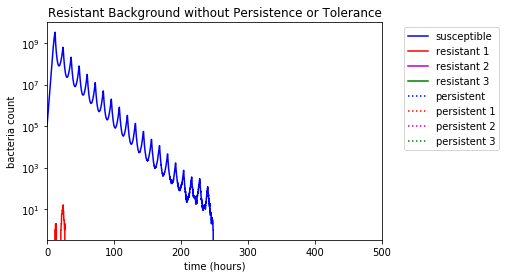

In [25]:
# NO TOLERANCE NO PERSISTENCE

r1 = [r_initial]*len(t)
r2 = [r_initial]*len(t)
r3 = [r_initial]*len(t)
s = [s_initial]*len(t)
tol = [t_initial]*len(t)
ps = [p_initial]*len(t)
pr1 = [p_initial]*len(t)
pr2 = [p_initial]*len(t)
pr3 = [p_initial]*len(t)
tolr1 = [0]*len(t)
tolr2 = [0]*len(t)
tolr3 = [0]*len(t)
totaltol = [0]*len(t)
totalr = [0]*len(t)
totalp = [0]*len(t)
t_lag = 0
K = 5*10**9
mean_sr = [0]*len(t)
mean_tr = [0]*len(t)
mean_st = [0]*len(t)
mean_sp = [0]*len(t)
mean_ps = [0]*len(t)
mean_pr = [0]*len(t)
mu_tr1 = [0]*len(t)
mu_tr2 = [0]*len(t)
mu_tr3 = [0]*len(t)
mu_sr1 = [0]*len(t)
mu_sr2 = [0]*len(t)
mu_sr3 = [0]*len(t)
mu_st = [0]*len(t)
mu_st1 = [0]*len(t)
mu_st2 = [0]*len(t)
mu_st3 = [0]*len(t)
mu_pr1 = [0]*len(t)
mu_pr2 = [0]*len(t)
mu_pr3 = [0]*len(t)
mu_sp = [0]*len(t)
mu_sp1 = [0]*len(t)
mu_sp2 = [0]*len(t)
mu_sp3 = [0]*len(t)
mu_ps = [0]*len(t)
mu_ps1 = [0]*len(t)
mu_ps2 = [0]*len(t)
mu_ps3 = [0]*len(t)

def growth_rate_r1(c):
    return max_growth_r1
def growth_rate_r2(c):
    return max_growth_r2
def growth_rate_r3(c):
    return max_growth_r3
def growth_rate_s(c):
    return max_growth_s 
    return max_growth_s/MDK
def death_rate_r1(c):
    return (((max_growth_r1 - min_growth)*((c/MIC_r1)**k))/(((c/MIC_r1)**k)-(min_growth/max_growth_r1)))
def death_rate_r2(c):
    return (((max_growth_r2 - min_growth)*((c/MIC_r2)**k))/(((c/MIC_r2)**k)-(min_growth/max_growth_r2)))
def death_rate_r3(c):
    return (((max_growth_r3 - min_growth)*((c/MIC_r3)**k))/(((c/MIC_r3)**k)-(min_growth/max_growth_r3)))
def death_rate_s(c):
    return (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))
def death_rate_t(c):
    return (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))/MDK
def mut_frequency(c):
    mu_basal = 2.15*10**-10 # basal mutation rate
    m = 5 # max fold increase in mutation rate
    h = 2.5 # steepness of curve
    return mu_basal + (1-np.exp(-h*c))*(m-1)*mu_basal
# the mutation frequency increases with antibiotic concentration, but 
# the number of susceptible bacteria also declines, so it's a tradeoff

def simulation_tp(seed):
    np.random.seed(seed)
    for i in range(len(t)-1):
    # 1/generation time
        g_r1 = growth_rate_r1(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r1 = death_rate_r1(conc(i*dt))
        g_r2 = growth_rate_r2(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r2 = death_rate_r2(conc(i*dt))
        g_r3 = growth_rate_r3(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r3 = death_rate_r3(conc(i*dt))
        g_s = growth_rate_s(conc(i*dt))
        d_s = death_rate_s(conc(i*dt))
        totalr[i] = r1[i] + r2[i] + r3[i] + tolr1[i] + tolr2[i] + tolr3[i] + pr1[i] + pr2[i] + pr3[i]
        totalp[i] = ps[i] + pr1[i] + pr2[i] + pr3[i]
        N = r1[i] + r2[i] + r3[i] + ps[i] + pr1[i] + pr2[i] + pr3[i] + s[i]
        mean_sr[i] = abs(dt*(mut_frequency(conc(i*dt)))*g_s*(1-N/K))
        mu_sr1[i] = mean_sr[i]*s[i]
        mu_sr2[i] = mean_sr[i]*r1[i]
        mu_sr3[i] = mean_sr[i]*r2[i]
# change in population from regular growth
        if r1[i]*(1-(N/K))*(g_r1*dt) > 0: 
            if r1[i]*(1-(N/K))*(g_r1*dt) - d_r1*r1[i]*dt > -r1[i] and r1[i] >= 1: 
                r1[i+1] = (r1[i] + np.random.poisson(r1[i]*(1-(N/K))*(g_r1*dt)) - np.random.poisson(d_r1*r1[i]*dt))
            else:
                r1[i+1] = 0
        elif d_r1*r1[i]*dt > 0:
            r1[i+1] = r1[i] - np.random.poisson(d_r1*r1[i]*dt)
        else:
            r1[i+1] = r1[i]
        if r2[i]*(1-(N/K))*(g_r2*dt) > 0: 
            if r2[i]*(1-(N/K))*(g_r2*dt) - d_r2*r2[i]*dt > -r2[i] and r2[i] >= 1: 
                r2[i+1] = (r2[i] + np.random.poisson(r2[i]*(1-(N/K))*(g_r2*dt)) - np.random.poisson(d_r2*r2[i]*dt))
            else:
                r2[i+1] = 0
        elif d_r2*r2[i]*dt > 0:
            r2[i+1] = r2[i] - np.random.poisson(d_r2*r2[i]*dt)
        else:
            r2[i+1] = r2[i]
        if r3[i]*(1-(N/K))*(g_r3*dt) > 0: 
            if r3[i]*(1-(N/K))*(g_r3*dt) - d_r3*r3[i]*dt > -r3[i] and r3[i] >= 1: 
                r3[i+1] = (r3[i] + np.random.poisson(r3[i]*(1-(N/K))*(g_r3*dt)) - np.random.poisson(d_r3*r3[i]*dt))
            else:
                r3[i+1] = 0
        elif d_r3*r3[i]*dt > 0:
            r3[i+1] = r3[i] - np.random.poisson(d_r3*r3[i]*dt)
        else:
            r3[i+1] = r3[i]
        if s[i]*(1-(N/K))*(g_s*dt) > 0:
            if (np.random.poisson(s[i]*(1-(N/K))*(g_s*dt)) - np.random.poisson(abs(d_s*s[i]*dt))) > -s[i] and s[i] >= 1:
                s[i+1] = s[i] + np.random.poisson(s[i]*(1-(N/K))*(g_s*dt)) - np.random.poisson(abs(d_s*s[i]*dt))
            else:
                s[i+1] = 0
        elif d_s*s[i]*dt > 0:
            s[i+1] = s[i] - np.random.poisson(d_s*s[i]*dt)
        else:
            s[i+1] = s[i]
# change in population from mutations 
        try:
            s[i+1] += (- np.random.poisson(mu_sr1[i]))
        except:
            pass
        try:
            r1[i+1] += (np.random.poisson(mu_sr1[i]) - np.random.poisson(mu_sr2[i]))
        except:
            pass
        try:
            r2[i+1] += (np.random.poisson(mu_sr2[i]) - np.random.poisson(mu_sr3[i]))
        except:
            pass
        try:
            r3[i+1] += (np.random.poisson(mu_sr3[i]))
        except:
            pass
        
# tolerant/persistent bacteria have been shown to have mutation rates 10^4 fold that of susceptible
# Levin Reisman paper showed that tolerance mutations are around 50 times more common than resistant

# solve models
simulation_tp(2)

# plot results
plt.figure()
# plt.plot(t,totalr,label="resistant")
plt.plot(t,s,label="susceptible",color='b',linestyle='solid')
plt.plot(t,r1,label="resistant 1",color='r',linestyle='solid')
plt.plot(t,r2,label="resistant 2",color='m',linestyle='solid')
plt.plot(t,r3,label="resistant 3",color='g',linestyle='solid')
# plt.plot(t,totalp,label="persistent")
plt.plot(t,ps,label="persistent",color='b',linestyle='dotted')
plt.plot(t,pr1,label="persistent 1",color='r',linestyle='dotted')
plt.plot(t,pr2,label="persistent 2",color='m',linestyle='dotted')
plt.plot(t,pr3,label="persistent 3",color='g',linestyle='dotted')
plt.xlabel('time (hours)')
plt.xlim(0,T)
plt.ylabel('bacteria count')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.title("Resistant Background without Persistence or Tolerance")
plt.show()

In [ ]:
time = 500
dtime = 1
times = np.arange(0,time,dtime)
scounts = [0]*int(time/dtime)
r1counts = [0]*int(time/dtime)
r2counts = [0]*int(time/dtime)
r3counts = [0]*int(time/dtime)
tolcounts = [0]*int(time/dtime)
tolr1counts = [0]*int(time/dtime)
tolr2counts = [0]*int(time/dtime)
tolr3counts = [0]*int(time/dtime)
pscounts = [0]*int(time/dtime)
pr1counts = [0]*int(time/dtime)
pr2counts = [0]*int(time/dtime)
pr3counts = [0]*int(time/dtime)
weightedMICs = []
weightedMDKs = []
def present_probability_r(runs,time,dtime):
    for q in range(runs):
        simulation_tp(q)
        for i in range(int(time/dtime)):
            if s[100*dtime*i] > 10:
                scounts[i] += 1
            if r1[100*dtime*i] > 10:
                r1counts[i] += 1
            if r2[100*dtime*i] > 10:
                r2counts[i] += 1
            if r3[100*dtime*i] > 10:
                r3counts[i] += 1
            if ps[100*dtime*i] > 10:
                pscounts[i] += 1
            if pr1[100*dtime*i] > 10:
                pr1counts[i] += 1
            if pr2[100*dtime*i] > 10:
                pr2counts[i] += 1
            if pr3[100*dtime*i] > 10:
                pr3counts[i] += 1
        totalBacteria = s[-1]+tol[-1]+ps[-1]+r1[-1]+tolr1[-1]+pr1[-1]+r2[-1]+tolr2[-1]+pr2[-1]+r3[-1]+tolr3[-1]+pr3[-1]
        totalMICs = s[-1]+tol[-1]+ps[-1]
        totalMIC1 = r1[-1]+tolr1[-1]+pr1[-1]
        totalMIC2 = r2[-1]+tolr2[-1]+pr2[-1]
        totalMIC3 = r3[-1]+tolr3[-1]+pr3[-1]
        weightedMIC = (totalMICs/totalBacteria)*MIC + (totalMIC1/totalBacteria)*MIC_r1 + (totalMIC2/totalBacteria)*MIC_r2 + (totalMIC3/totalBacteria)*MIC_r3
        weightedMDK = ((tol[-1]+tolr1[-1]+tolr2[-1]+tolr3[-1])/totalBacteria)*MDK + (totalBacteria-(tol[-1]+tolr1[-1]+tolr2[-1]+tolr3[-1]))/totalBacteria
        weightedMICs.append(weightedMIC)
        weightedMDKs.append(weightedMDK)
present_probability_r(100,time,dtime)

In [ ]:
times = np.arange(0,time,dtime)
plt.figure()
plt.scatter(times,scounts,label="susceptible")
plt.scatter(times,r1counts,label="resistant 1")
plt.scatter(times,r2counts,label="resistant 2")
plt.scatter(times,r3counts,label="resistant 3")
plt.xlabel("time (hours)")
plt.ylabel("% probability of fixation")
plt.legend()
plt.show()

sstart = 0
send = 0
r1start = 0
r1end = 0
r2start = 0
r2end = 0
r3start = 0
r3end = 0

for i in range(sstart, len(scounts)):
    if scounts[i] < 50:
        send = i
        print("The susceptible bacteria are no longer present at ", send, "hours")
        break
if send == 0:
    print("The susceptible bacteria are present to the end of the treatment.")


for i in range(len(r1counts)):
    if r1counts[i] > 50:
        r1start = i
        break
if r1start > 0:
    for i in range(r1start, len(r1counts)):
        if r1counts[i] < 50:
            r1end = i
            print("The first resistant bacteria are present between", r1start, "and", r1end, "hours")
            break
if r1start == 0:
    print("The first resistant bacteria never appear")
if r1end == 0:
    print("The first resistant bacteria are present from", r1start, "hours to the end of the treatment.")

for i in range(len(r2counts)):
    if r2counts[i] > 50:
        r2start = i
        break
if r2start > 0:
    for i in range(r2start, len(r2counts)):
        if r2counts[i] < 50:
            r2end = i
            print("The second resistant bacteria are present between", r2start, "and", r2end, "hours")
            break
if r2start == 0:
    print("The second resistant bacteria never appear")
if r2end == 0:
    print("The second resistant bacteria are present from", r2start, "hours to the end of the treatment.")


for i in range(len(r3counts)):
    if r3counts[i] > 50:
        r3start = i
        break
if r3start > 0:
    for i in range(r3start, len(r3counts)):
        if r3counts[i] < 50:
            r3end = i
            print("The third resistant bacteria are present between", r3start, "and", r3end, "hours")
            break
if r3start == 0:
    print("The third resistant bacteria never appear")
if r3end == 0:
    print("The third resistant bacteria are present from", r3start, "hours to the end of the treatment.")

plt.figure()
plt.scatter(times,tolcounts,label="tolerant")
plt.scatter(times,tolr1counts,label="tolerant 1")
plt.scatter(times,tolr2counts,label="tolerant 2")
plt.scatter(times,tolr3counts,label="tolerant 3")
plt.xlabel("time (hours)")
plt.ylabel("% probability of fixation")
plt.legend()
plt.show() 

tolstart = 0
tolend = 0
tolr1start = 0
tolr1end = 0
tolr2start = 0
tolr2end = 0
tolr3start = 0
tolr3end = 0

for i in range(len(tolcounts)):
    if tolcounts[i] > 50:
        tolstart = i
        break
if tolstart > 0:
    for i in range(tolstart, len(tolcounts)):
        if tolcounts[i] < 50:
            tolend = i
            print("The susceptible tolerant bacteria are present between", tolstart, "and", tolend, "hours")
            break
if tolstart == 0:
    print("The susceptible tolerant bacteria never appear")
if tolend == 0:
    print("The susceptible tolerant bacteria are present from", tolstart, "hours to the end of the treatment.")


for i in range(len(tolr1counts)):
    if tolr1counts[i] > 50:
        tolr1start = i
        break
if tolr1start > 0:
    for i in range(tolr1start, len(tolr1counts)):
        if tolr1counts[i] < 50:
            tolr1end = i
            print("The first tolerant bacteria are present between", tolr1start, "and", tolr1end, "hours")
            break
if tolr1start == 0:
    print("The first tolerant bacteria never appear")
if tolr1end == 0:
    print("The first tolerant bacteria are present from", tolr1start, "hours to the end of the treatment.")

for i in range(len(tolr2counts)):
    if tolr2counts[i] > 50:
        tolr2start = i
        break
if tolr2start > 0:
    for i in range(tolr2start, len(tolr2counts)):
        if tolr2counts[i] < 50:
            tolr2end = i
            print("The second tolerant bacteria are present between", tolr2start, "and", tolr2end, "hours")
            break
if tolr2start == 0:
    print("The second tolerant bacteria never appear")
if tolr2end == 0:
    print("The second tolerant bacteria are present from", tolr2start, "hours to the end of the treatment.")


for i in range(len(tolr3counts)):
    if tolr3counts[i] > 50:
        tolr3start = i
        break
if tolr3start > 0:
    for i in range(tolr3start, len(tolr3counts)):
        if tolr3counts[i] < 50:
            tolr3end = i
            print("The third tolerant bacteria are present between", tolr3start, "and", tolr3end, "hours")
            break
if tolr3start == 0:
    print("The third tolerant bacteria never appear")
if tolr3end == 0:
    print("The third tolerant bacteria are present from", tolr3start, "hours to the end of the treatment.")

plt.figure()
plt.scatter(times,pscounts,label="persistent")
plt.scatter(times,pr1counts,label="persistent 1")
plt.scatter(times,pr2counts,label="persistent 2")
plt.scatter(times,pr3counts,label="persistent 3")
plt.xlabel("time (hours)")
plt.ylabel("% probability of fixation")
plt.legend()
plt.show() 

psstart = 0
psend = 0
pr1start = 0
pr1end = 0
pr2start = 0
pr2end = 0
pr3start = 0
pr3end = 0

for i in range(len(pscounts)):
    if pscounts[i] > 50:
        psstart = i
        break
if psstart > 0:
    for i in range(r1start, len(pscounts)):
        if pscounts[i] < 50:
            psend = i
            print("The susceptible persistent bacteria are present between", psstart, "and", psend, "hours")
            break
if psstart == 0:
    print("The susceptible persistent bacteria never appear")
if psend == 0:
    print("The susceptible persistent bacteria are present from", psstart, "hours to the end of the treatment.")


for i in range(len(pr1counts)):
    if pr1counts[i] > 50:
        pr1start = i
        break
if pr1start > 0:
    for i in range(pr1start, len(pr1counts)):
        if pr1counts[i] < 50:
            pr1end = i
            print("The first persistent bacteria are present between", pr1start, "and", pr1end, "hours")
            break
if pr1start == 0:
    print("The first persistent bacteria never appear")
if pr1end == 0:
    print("The first persistent bacteria are present from", pr1start, "hours to the end of the treatment.")

for i in range(len(pr2counts)):
    if pr2counts[i] > 50:
        pr2start = i
        break
if pr2start > 0:
    for i in range(pr2start, len(pr2counts)):
        if pr2counts[i] < 50:
            pr2end = i
            print("The second persistent bacteria are present between", pr2start, "and", pr2end, "hours")
            break
if pr2start == 0:
    print("The second persistent bacteria never appear")
if pr2end == 0:
    print("The second persistent bacteria are present from", pr2start, "hours to the end of the treatment.")


for i in range(len(pr3counts)):
    if pr3counts[i] > 50:
        pr3start = i
        break
if pr3start > 0:
    for i in range(pr3start, len(pr3counts)):
        if pr3counts[i] < 50:
            pr3end = i
            print("The third persistent bacteria are present between", pr3start, "and", pr3end, "hours")
            break
if pr3start == 0:
    print("The third persistent bacteria never appear")
if pr3end == 0:
    print("The third persistent bacteria are present from", pr3start, "hours to the end of the treatment.")

print("Average weighted MIC = ", sum(weightedMICs)/len(weightedMICs))
print("Average weighted MDK = ", sum(weightedMDKs)/len(weightedMDKs))

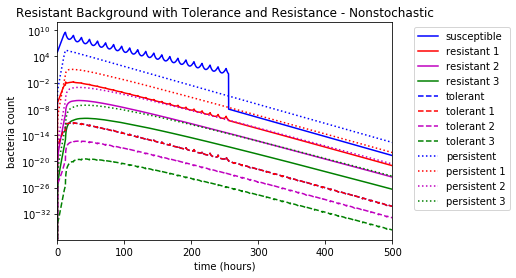

In [29]:
# TOLERANCE AND PERSISTENCE NONSTOCHASTIC


def growth_rate_r1(c):
    return max_growth_r1
def growth_rate_r2(c):
    return max_growth_r2
def growth_rate_r3(c):
    return max_growth_r3
def growth_rate_s(c):
    return max_growth_s 
def growth_rate_t(c):
    return max_growth_r1/MDK
def growth_rate_tolr1(c):
    return max_growth_r2/MDK
def growth_rate_tolr2(c):
    return max_growth_r3/MDK
def growth_rate_tolr3(c):
    return max_growth_s/MDK
def death_rate_r1(c):
    return (((max_growth_r1 - min_growth)*((c/MIC_r1)**k))/(((c/MIC_r1)**k)-(min_growth/max_growth_r1)))
def death_rate_r2(c):
    return (((max_growth_r2 - min_growth)*((c/MIC_r2)**k))/(((c/MIC_r2)**k)-(min_growth/max_growth_r2)))
def death_rate_r3(c):
    return (((max_growth_r3 - min_growth)*((c/MIC_r3)**k))/(((c/MIC_r3)**k)-(min_growth/max_growth_r3)))
def death_rate_s(c):
    return (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))
def death_rate_t(c):
    return (((max_growth_s - min_growth)*(c/MIC)**k)/(((c/MIC)**k)-(min_growth/max_growth_s)))/MDK
def death_rate_tolr1(c):
    return (((max_growth_r1 - min_growth)*(c/MIC_r1)**k)/(((c/MIC_r1)**k)-(min_growth/max_growth_r1)))/MDK
def death_rate_tolr2(c):
    return (((max_growth_r2 - min_growth)*(c/MIC_r2)**k)/(((c/MIC_r2)**k)-(min_growth/max_growth_r2)))/MDK
def death_rate_tolr3(c):
    return (((max_growth_r3 - min_growth)*(c/MIC_r3)**k)/(((c/MIC_r3)**k)-(min_growth/max_growth_r3)))/MDK
def mut_frequency(c):
    mu_basal = 2.15*10**-10 # basal mutation rate
    m = 5 # max fold increase in mutation rate
    h = 2.5 # steepness of curve
    return mu_basal + (1-np.exp(-h*c))*(m-1)*mu_basal
# the mutation frequency increases with antibiotic concentration, but 
# the number of susceptible bacteria also declines, so it's a tradeoff

def simulation_tp(seed):
    np.random.seed(seed)
    for i in range(len(t)-1):
    # 1/generation time
        g_r1 = growth_rate_r1(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r1 = death_rate_r1(conc(i*dt))
        g_r2 = growth_rate_r2(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r2 = death_rate_r2(conc(i*dt))
        g_r3 = growth_rate_r3(conc(i*dt)) # must multiply by dt to scale it (not 1,2,3, but 0.1,0.2,0.3, etc)
        d_r3 = death_rate_r3(conc(i*dt))
        g_s = growth_rate_s(conc(i*dt))
        d_s = death_rate_s(conc(i*dt))
        g_t = growth_rate_t(conc(i*dt))
        d_t = death_rate_t(conc(i*dt))
        g_tolr1 = growth_rate_tolr1(conc(i*dt))
        d_tolr1 = death_rate_tolr1(conc(i*dt))
        g_tolr2 = growth_rate_tolr2(conc(i*dt))
        d_tolr2 = death_rate_tolr2(conc(i*dt))
        g_tolr3 = growth_rate_tolr3(conc(i*dt))
        d_tolr3 = death_rate_tolr3(conc(i*dt))
        totaltol[i] = tol[i] + tolr1[i] + tolr2[i] + tolr3[i]
        totalr[i] = r1[i] + r2[i] + r3[i] + tolr1[i] + tolr2[i] + tolr3[i] + pr1[i] + pr2[i] + pr3[i]
        totalp[i] = ps[i] + pr1[i] + pr2[i] + pr3[i]
        N = tol[i] + tolr1[i] + tolr2[i] + tolr3[i] + r1[i] + r2[i] + r3[i] + ps[i] + pr1[i] + pr2[i] + pr3[i] + s[i]
        mean_tr[i] = abs((10**4)*dt*(mut_frequency(conc(i*dt))*g_t*(1-N/K)))
        mean_sr[i] = abs(dt*(mut_frequency(conc(i*dt)))*g_s*(1-N/K))
        mean_st[i] = abs(50*dt*(mut_frequency(conc(i*dt)))*g_s*(1-N/K))
        mean_sp[i] = abs(dt*0.0001*(N/K)) 
        mean_ps[i] = abs(dt*0.1)
        mean_pr[i] = abs(10**4*dt*mut_frequency(conc(i*dt)))
        mu_tr1[i] = mean_tr[i]*tol[i]
        mu_tr2[i] = mean_tr[i]*tolr1[i]
        mu_tr3[i] = mean_tr[i]*tolr2[i]
        mu_sr1[i] = mean_sr[i]*s[i]
        mu_sr2[i] = mean_sr[i]*r1[i]
        mu_sr3[i] = mean_sr[i]*r2[i]
        mu_st[i] = mean_st[i]*s[i]
        mu_st1[i] = mean_st[i]*r1[i]
        mu_st2[i] = mean_st[i]*r2[i]
        mu_st3[i] = mean_st[i]*r3[i]
        mu_pr1[i] = mean_pr[i]*ps[i]
        mu_pr2[i] = mean_pr[i]*pr1[i]
        mu_pr3[i] = mean_pr[i]*pr2[i]
        mu_sp[i] = mean_sp[i]*s[i]
        mu_sp1[i] = mean_sp[i]*r1[i]
        mu_sp2[i] = mean_sp[i]*r2[i]
        mu_sp3[i] = mean_sp[i]*r3[i]
        mu_ps[i] = mean_ps[i]*ps[i]
        mu_ps1[i] = mean_ps[i]*pr1[i]
        mu_ps2[i] = mean_ps[i]*pr2[i]
        mu_ps3[i] = mean_ps[i]*pr3[i]
# change in population from regular growth
        if r1[i]*(1-(N/K))*(g_r1*dt) > 0: 
            if r1[i]*(1-(N/K))*(g_r1*dt) - d_r1*r1[i]*dt > -r1[i] and r1[i] >= 1: 
                r1[i+1] = (r1[i] + (r1[i]*(1-(N/K))*(g_r1*dt)) - (d_r1*r1[i]*dt))
                r1[i+1] += ((mu_sr1[i]) + (mu_ps1[i]) - (mu_st1[i]) - (mu_sr1[i]) - (mu_sp1[i]))
            else:
                r1[i+1] = 0
        elif d_r1*r1[i]*dt > 0:
            r1[i+1] = r1[i] - (d_r1*r1[i]*dt)
        else:
            r1[i+1] = r1[i]
        if r2[i]*(1-(N/K))*(g_r2*dt) > 0: 
            if r2[i]*(1-(N/K))*(g_r2*dt) - d_r2*r2[i]*dt > -r2[i] and r2[i] >= 1: 
                r2[i+1] = (r2[i] + (r2[i]*(1-(N/K))*(g_r2*dt)) - (d_r2*r2[i]*dt))
            else:
                r2[i+1] = 0
        elif d_r2*r2[i]*dt > 0:
            r2[i+1] = r2[i] - (d_r2*r2[i]*dt)
        else:
            r2[i+1] = r2[i]
        if r3[i]*(1-(N/K))*(g_r3*dt) > 0: 
            if r3[i]*(1-(N/K))*(g_r3*dt) - d_r3*r3[i]*dt > -r3[i] and r3[i] >= 1: 
                r3[i+1] = (r3[i] + (r3[i]*(1-(N/K))*(g_r3*dt)) - (d_r3*r3[i]*dt))
            else:
                r3[i+1] = 0
        elif d_r3*r3[i]*dt > 0:
            r3[i+1] = r3[i] - (d_r3*r3[i]*dt)
        else:
            r3[i+1] = r3[i]
        if tolr1[i]*(1-(N/K))*(g_tolr1*dt) > 0: 
            if (tolr1[i]*(1-(N/K))*(g_tolr1*dt)) - d_tolr1*tolr1[i]*dt > -tolr1[i] and tolr1[i] >= 1:
                tolr1[i+1] = tolr1[i] + (tolr1[i]*(1-(N/K))*(g_tolr1*dt)) - (d_tolr1*tolr1[i]*dt)
            else:
                tolr1[i+1] = 0
        elif d_tolr1*tolr1[i]*dt > 0:
            tolr1[i+1] = tolr1[i] - (d_tolr1*tolr1[i]*dt)
        else:
            tolr1[i+1] = tolr1[i]
        if tolr2[i]*(1-(N/K))*(g_tolr2*dt) > 0: 
            if (tolr2[i]*(1-(N/K))*(g_tolr2*dt)) - d_tolr2*tolr2[i]*dt > -tolr2[i] and tolr2[i] >= 1:
                tolr2[i+1] = tolr2[i] + (tolr2[i]*(1-(N/K))*(g_tolr2*dt)) - (d_tolr2*tolr2[i]*dt)
            else:
                tolr2[i+1] = 0
        elif d_tolr2*tolr2[i]*dt > 0:
            tolr2[i+1] = tolr2[i] - (d_tolr2*tolr2[i]*dt)
        else:
            tolr2[i+1] = tolr2[i]
        if tolr3[i]*(1-(N/K))*(g_tolr3*dt) > 0: 
            if (tolr3[i]*(1-(N/K))*(g_tolr3*dt)) - d_tolr3*tolr3[i]*dt > -tolr3[i] and tolr3[i] >= 1:
                tolr3[i+1] = tolr3[i] + (tolr3[i]*(1-(N/K))*(g_tolr3*dt)) - (d_tolr3*tolr3[i]*dt)
            else:
                tolr3[i+1] = 0
        elif d_tolr3*tolr3[i]*dt > 0:
            tolr3[i+1] = tolr3[i] - (d_tolr3*tolr3[i]*dt)
        else:
            tolr3[i+1] = tolr3[i]
        if s[i]*(1-(N/K))*(g_s*dt) > 0:
            if ((s[i]*(1-(N/K))*(g_s*dt)) - (abs(d_s*s[i]*dt))) > -s[i] and s[i] >= 1:
                s[i+1] = s[i] + (s[i]*(1-(N/K))*(g_s*dt)) - (abs(d_s*s[i]*dt))
            else:
                s[i+1] = 0
        elif d_s*s[i]*dt > 0:
            s[i+1] = s[i] - (d_s*s[i]*dt)
        else:
            s[i+1] = s[i]
        if i*dt>t_lag:
            if tol[i]*(1-(N/K))*(g_t*dt) > 0:
                if (tol[i]*(1-(N/K))*(g_t*dt)) - d_t*tol[i]*dt > -tol[i] and tol[i] >= 1:
                    tol[i+1] = tol[i] + (tol[i]*(1-(N/K))*(g_t*dt)) - (d_t*tol[i]*dt)
                else:
                    tol[i+1] = 0
            elif d_t*tol[i]*dt > 0:
                tol[i+1] = tol[i] - (d_t*tol[i]*dt)
            else:
                tol[i+1] = tol[i]
        else:
            tol[i+1] = tol[i]
        ps[i+1] = ps[i] + 0*ps[i] # no growth or death for persistent bacteria
        pr1[i+1] = pr1[i] + 0*pr1[i]
        pr2[i+1] = pr2[i] + 0*pr2[i]
        pr3[i+1] = pr3[i] + 0*pr3[i]
# change in population from mutations 
        s[i+1] += ((mu_ps[i]) - (mu_sr1[i]) - (mu_st1[i]) - (mu_sp[i]))
        r1[i+1] += ((mu_sr1[i]) + (mu_ps1[i]) - (mu_sr2[i]) - (mu_sp1[i]) - (mu_st1[i]))
        r2[i+1] += ((mu_sr2[i]) + (mu_ps2[i]) - (mu_st2[i]) - (mu_sr2[i]) - (mu_sp2[i]))
        r3[i+1] += ((mu_sr3[i]) + (mu_ps3[i]) - (mu_st3[i]) - (mu_sp3[i]))
        tol[i+1] += (-(mu_tr1[i]) + (mu_st1[i]))
        tolr1[i+1] += ((mu_tr1[i]) + (mu_st1[i]) - (mu_tr2[i]))
        tolr2[i+1] += ((mu_tr2[i]) + (mu_st2[i]) - (mu_tr3[i]))
        tolr3[i+1] += ((mu_tr3[i]) + (mu_st3[i]))
        ps[i+1] += ((mu_sp[i]) - (mu_ps[i]) - (mu_pr1[i]))
        pr1[i+1] += ((mu_pr1[i]) + (mu_sp1[i]) - (mu_sp2[i]) - (mu_ps1[i]))
        pr2[i+1] += ((mu_pr2[i]) + (mu_sp2[i]) - (mu_sp3[i]) - (mu_ps2[i]))
        pr3[i+1] += ((mu_pr3[i]) + (mu_sp3[i]) - (mu_ps3[i]))
# tolerant/persistent bacteria have been shown to have mutation rates 10^4 fold that of susceptible
# Levin Reisman paper showed that tolerance mutations are around 50 times more common than resistant

# solve models
simulation_tp(48)

# plot results
plt.figure()
# plt.plot(t,totalr,label="resistant")
plt.plot(t,s,label="susceptible",color='b',linestyle='solid')
plt.plot(t,r1,label="resistant 1",color='r',linestyle='solid')
plt.plot(t,r2,label="resistant 2",color='m',linestyle='solid')
plt.plot(t,r3,label="resistant 3",color='g',linestyle='solid')
# plt.plot(t,totaltol,label="tolerant")
plt.plot(t,tol,label="tolerant",color='b',linestyle='dashed')
plt.plot(t,tolr1,label="tolerant 1",color='r',linestyle='dashed')
plt.plot(t,tolr2,label="tolerant 2",color='m',linestyle='dashed')
plt.plot(t,tolr3,label="tolerant 3",color='g',linestyle='dashed')
# plt.plot(t,totalp,label="persistent")
plt.plot(t,ps,label="persistent",color='b',linestyle='dotted')
plt.plot(t,pr1,label="persistent 1",color='r',linestyle='dotted')
plt.plot(t,pr2,label="persistent 2",color='m',linestyle='dotted')
plt.plot(t,pr3,label="persistent 3",color='g',linestyle='dotted')
plt.xlabel('time (hours)')
plt.xlim(0,T)
plt.ylabel('bacteria count')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.title("Resistant Background with Tolerance and Resistance - Nonstochastic")
plt.show()